## Deskripsi Kolom Pada Datases Pima Diabetes
* Pregnancies: Jumlah kehamilan yang pernah dialami oleh pasien.

* Glucose: Konsentrasi glukosa plasma dalam tes toleransi glukosa dua jam (mg/dL).

* BloodPressure: Tekanan darah diastolik (mm Hg).

* SkinThickness: Ketebalan lipatan kulit triceps (mm), digunakan untuk mengukur lemak bawah kulit.

* Insulin: Konsentrasi insulin serum 2 jam (mu U/ml), sebagai indikator kadar insulin.

* BMI (Body Mass Index): Indeks massa tubuh, dihitung sebagai berat badan (kg) dibagi tinggi badan kuadrat (m²).

* DiabetesPedigreeFunction: Skor yang menunjukkan riwayat genetik diabetes berdasarkan silsilah keluarga.

* Age: Usia pasien (dalam tahun).

* Outcome: Keluaran/label diagnosis:
  * 0 = Tidak menderita diabetes
  * 1 = Menderita diabetes

# Load Libraries yang Dibutuhkan

In [ ]:
!pip install squarify

In [ ]:
# Python libraries
import pandas as pd
import numpy as np

# Plots libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data Processing, Metrics and Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# URL dataset di GitHub (gunakan raw link)
url = "https://raw.githubusercontent.com/rilufiyy/GWO-with-Levy-Flight---Pima-Diabetes/main/diabetes.csv"

# Tampilkan
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


pada tabel di atas terdapat output 5 data teratas dari dataset yang digunakan, karena pada perintah sebelumnya menginginkan output terdapat 5 tabel teratas.

In [ ]:
#5 data terbawah
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


pada tabel di atas terdapat output 5 data terbawah dari dataset yang digunakan, karena pada perintah sebelumnya menginginkan output terdapat 5 tabel terbawah.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data di atas menunjukkan berbagai macam data type yg ada pada dataset tersebut. Untuk kolom pregnancies, glucose, bloodpressure, skinthickness, insulin, age, dan outcome merupakan tipe data integer, sedangkan kolom BMI dan DiabetesPedigreeFunction merupakan tipe data float. Pada output tersebut terlihat bahwa tidak ada missing value, maka tidak perlu penangan lebih lanjut untuk missing value.

In [ ]:
df.shape

(768, 9)

pada dataset 'Pima Diabetes' terdapat 768 baris dan 9 kolom.

# Data Preprocessing (Data Wrangling)

## 1.1 Missing Value

In [ ]:
# Cek Apakah ada missing value pada dataset
missing_value = df.isnull().sum()
print(missing_value)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Tidak ada missing value pada dataset

## 1.2 Duplicate

In [ ]:
duplikat_seluruh_baris = df[df.duplicated()]
print("Duplikat di seluruh baris data:")
print(duplikat_seluruh_baris)

Duplikat di seluruh baris data:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Setelah dilakukannya pengecekan untuk apakah terdapat duplikasi pada dataset, terlihat bahwa tidak ada duplicate pada dataset 'Pima Diabetes'

## 1.3 Outliers

In [ ]:
import pandas as pd
import numpy as np

# Fungsi untuk mengganti outliers menggunakan interpolasi
def replace_outliers_with_interpolate(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Buat salinan kolom agar aman dimodifikasi
    col_copy = column.copy()
    col_copy[(col_copy < lower_bound) | (col_copy > upper_bound)] = np.nan
    col_copy = col_copy.interpolate()  # Menggunakan interpolasi untuk mengisi NaN
    return col_copy

# Terapkan fungsi pada kolom-kolom yang ditentukan
for col in ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
            'Outcome']:
    df[col] = replace_outliers_with_interpolate(df[col])

# Cek hasil
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     0.184  33.0        1  


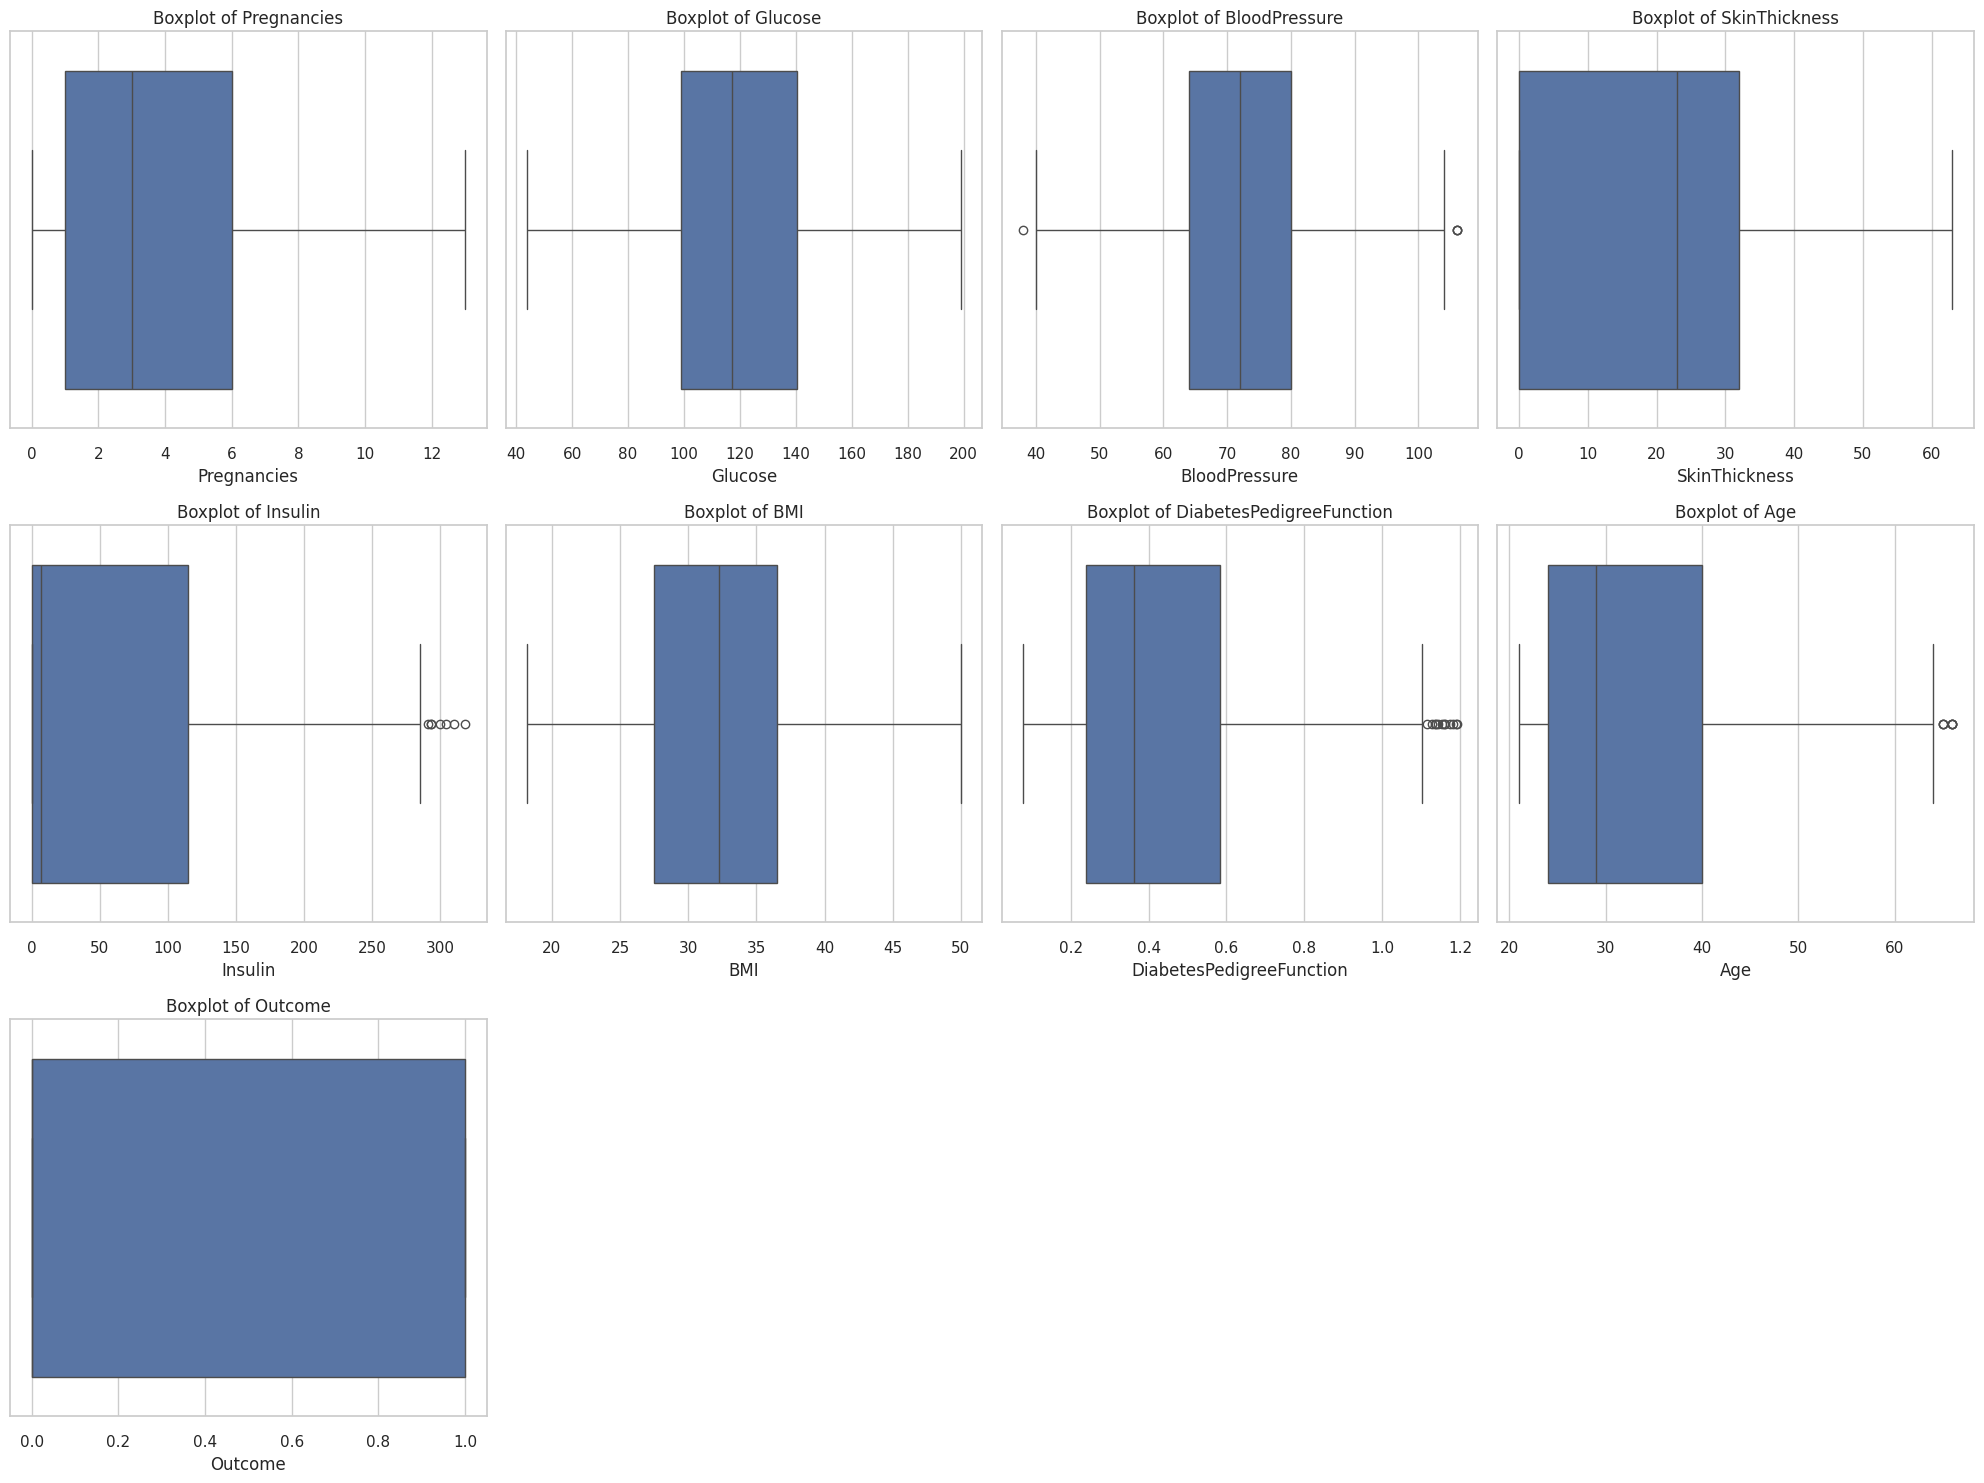

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan jumlah kolom yang akan ditampilkan per baris
cols_per_row = 4
num_cols = len(df.columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Menghitung jumlah baris yang dibutuhkan

# Membuat subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Meratakan axes untuk mempermudah indexing

# Membuat boxplot untuk setiap kolom
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

terdapat outliers pada kolom "insulin", "BloodPressure", "DiabetesPedigreeFunction", dan "Age". Maka selanjutnya akan dilakukan penanganan outliers pada kolom "insulin" dan "BloodPressure". Untuk "BloodPressure" tangani outlier tidak realistis (misalnya <40 mmHg), serta menangani nilai outlier dan nol pada insulin, di mana Nilai 0 akan dianggap sebagai data hilang dan diimputasi dengan median. Outlier ekstrem (>300 μU/mL) bisa di-truncate (dibatasi) atau juga diimputasi.


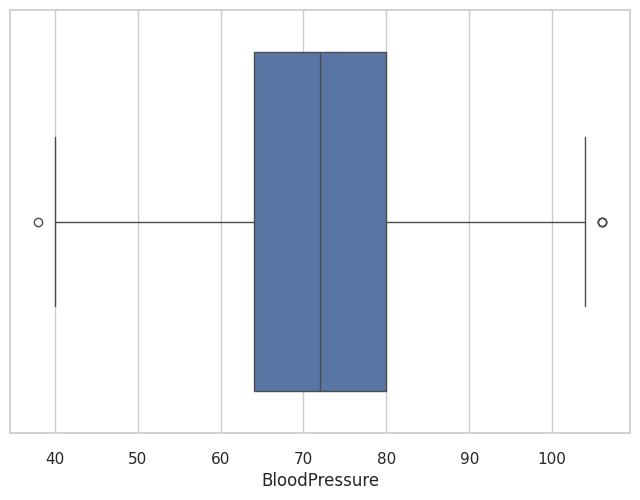

Nilai minimum pada kolom BloodPressure: 38.0
Nilai maksimum pada kolom BloodPressure: 106.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom yang ingin dicek
kolom = "BloodPressure"

# Buat boxplot dengan seaborn
sns.boxplot(x=df[kolom])
plt.show()

# Cari nilai minimum dan maksimum dari data asli (bukan dari boxplot)
min_value = df[kolom].min()
max_value = df[kolom].max()

print(f"Nilai minimum pada kolom {kolom}: {min_value}")
print(f"Nilai maksimum pada kolom {kolom}: {max_value}")

dengan renttang tekanan darah minimum nya yaitu 38 mmHg dan maksimumnya yaitu 106 mmHg, hal ini menunjukkan bahwa data tekanan darah diastolik pada pasien diabetes di dataset ini memiliki rentang yang cukup luas, yaitu 68 mmHg. Artinya, variasi tekanan darah di antara pasien cukup besar.

* Tekanan darah diastolik normal untuk orang dewasa biasanya sekitar 60-80 mmHg. (https://www.alodokter.com/kenali-tekanan-darah-normal-berdasarkan-usia)

* Tekanan darah diastolik dengan nilai 38 mmHg termasuk sangat rendah, kemungkinan hipotensi (tekanan darah rendah)

* Tekanan darah diastolik dengan nilai 106 mmHg melebihi batas normal (80mmHg) maka dapat dikatakan hipertensi diastolik, yang umum terjadi pada pasien diabetes.

Selanjutnya nilai ekstrem tersebut (38 mmHg atau 106 mmHg) akan dilihat hubungannya dengan outcome (apakah pasien mengidap diabetes atau tidak).

## under minimum

In [ ]:
under_blood = df[df['BloodPressure'] < 40].sort_values(by='Outcome')
under_blood

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26.0,0


Tekanan darah 38 mmHg jika dilihat hubungannya dengan outcome maka dapat dikatakan tidak mengidap diabetes, hal tersebut dapat dilihat dari outcome "0".

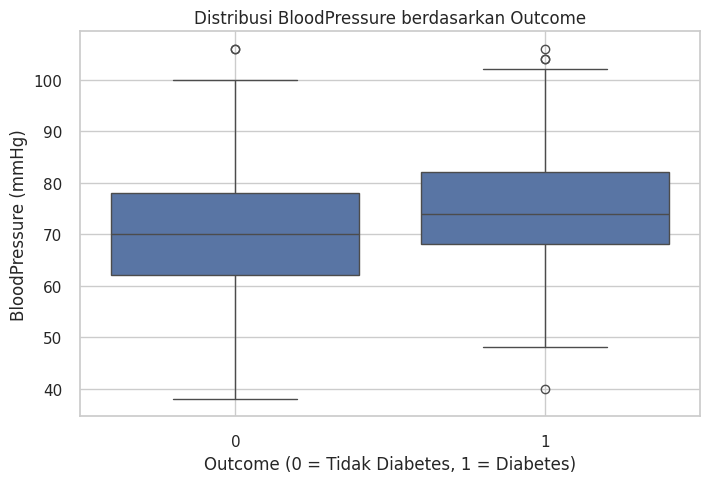


Rata-rata BloodPressure berdasarkan Outcome:
Outcome
0    70.814000
1    74.643657
Name: BloodPressure, dtype: float64


In [ ]:
# Boxplot untuk melihat distribusi BloodPressure berdasarkan Outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Distribusi BloodPressure berdasarkan Outcome')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('BloodPressure (mmHg)')
plt.grid(True)
plt.show()

# Hitung nilai rata-rata BloodPressure untuk masing-masing Outcome
mean_values = df.groupby('Outcome')['BloodPressure'].mean()
print("\nRata-rata BloodPressure berdasarkan Outcome:")
print(mean_values)

### Penjelasan Insight
* Pasien dengan Outcome = 1 (diabetes) memiliki rata-rata tekanan darah diastolik sebesar 74.64 mmHg.

* Sedangkan pasien dengan Outcome = 0 (tidak diabetes) rata-ratanya lebih rendah, yaitu 70.81 mmHg.

* Artinya, pasien diabetes cenderung memiliki tekanan darah diastolik yang lebih tinggi dibandingkan dengan yang tidak diabetes.

## Upper Maximum

In [ ]:
upper_blood = df[df['BloodPressure'] > 102].sort_values(by='Outcome')
upper_blood

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
658,11.0,127.0,106.0,0.0,0.0,39.0,0.190,51.0,0
672,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47.0,0
440,0.0,189.0,104.0,25.0,0.0,34.3,0.435,41.0,1
207,5.0,162.0,104.0,0.0,0.0,37.7,0.151,52.0,1
662,8.0,167.0,106.0,46.0,231.0,37.6,0.165,43.0,1


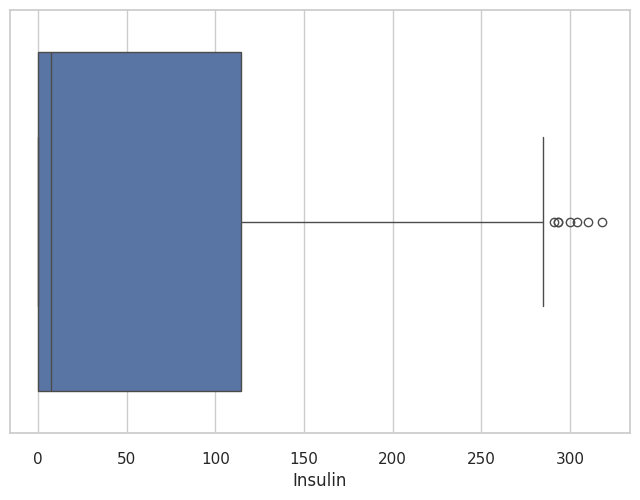

Nilai minimum pada kolom Insulin: 0.0
Nilai maksimum pada kolom Insulin: 318.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom yang ingin dicek
kolom = "Insulin"

# Buat boxplot dengan seaborn
sns.boxplot(x=df[kolom])
plt.show()

# Cari nilai minimum dan maksimum dari data asli (bukan dari boxplot)
min_value = df[kolom].min()
max_value = df[kolom].max()

print(f"Nilai minimum pada kolom {kolom}: {min_value}")
print(f"Nilai maksimum pada kolom {kolom}: {max_value}")

Nilai Insulin = 0 dalam dataset penyakit diabetes tidak wajar secara medis dan biasanya mencerminkan data yang hilang (missing value), bukan benar-benar nol insulin di tubuh pasien. Selanjutnya akan diganti nilai insulin, glucose, bloodpressure, skinthickness, BMI = 0 menjadi NaN.

In [ ]:
import numpy as np

# Ganti nilai 0 pada kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI menjadi NaN
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

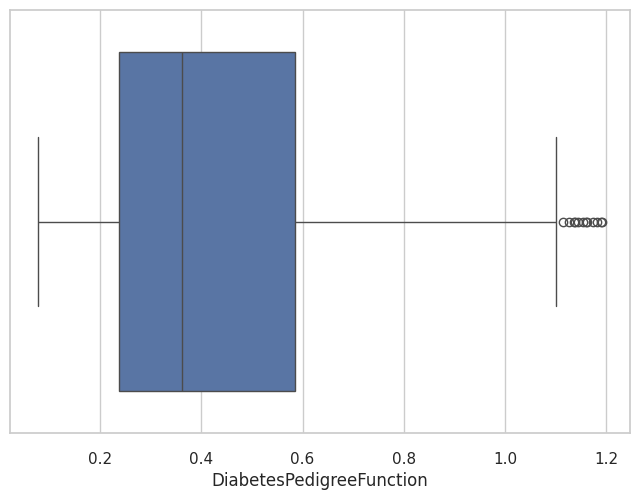

Nilai minimum pada kolom DiabetesPedigreeFunction: 0.078
Nilai maksimum pada kolom DiabetesPedigreeFunction: 1.191


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom yang ingin dicek
kolom = "DiabetesPedigreeFunction"

# Buat boxplot dengan seaborn
sns.boxplot(x=df[kolom])
plt.show()

# Cari nilai minimum dan maksimum dari data asli (bukan dari boxplot)
min_value = df[kolom].min()
max_value = df[kolom].max()

print(f"Nilai minimum pada kolom {kolom}: {min_value}")
print(f"Nilai maksimum pada kolom {kolom}: {max_value}")

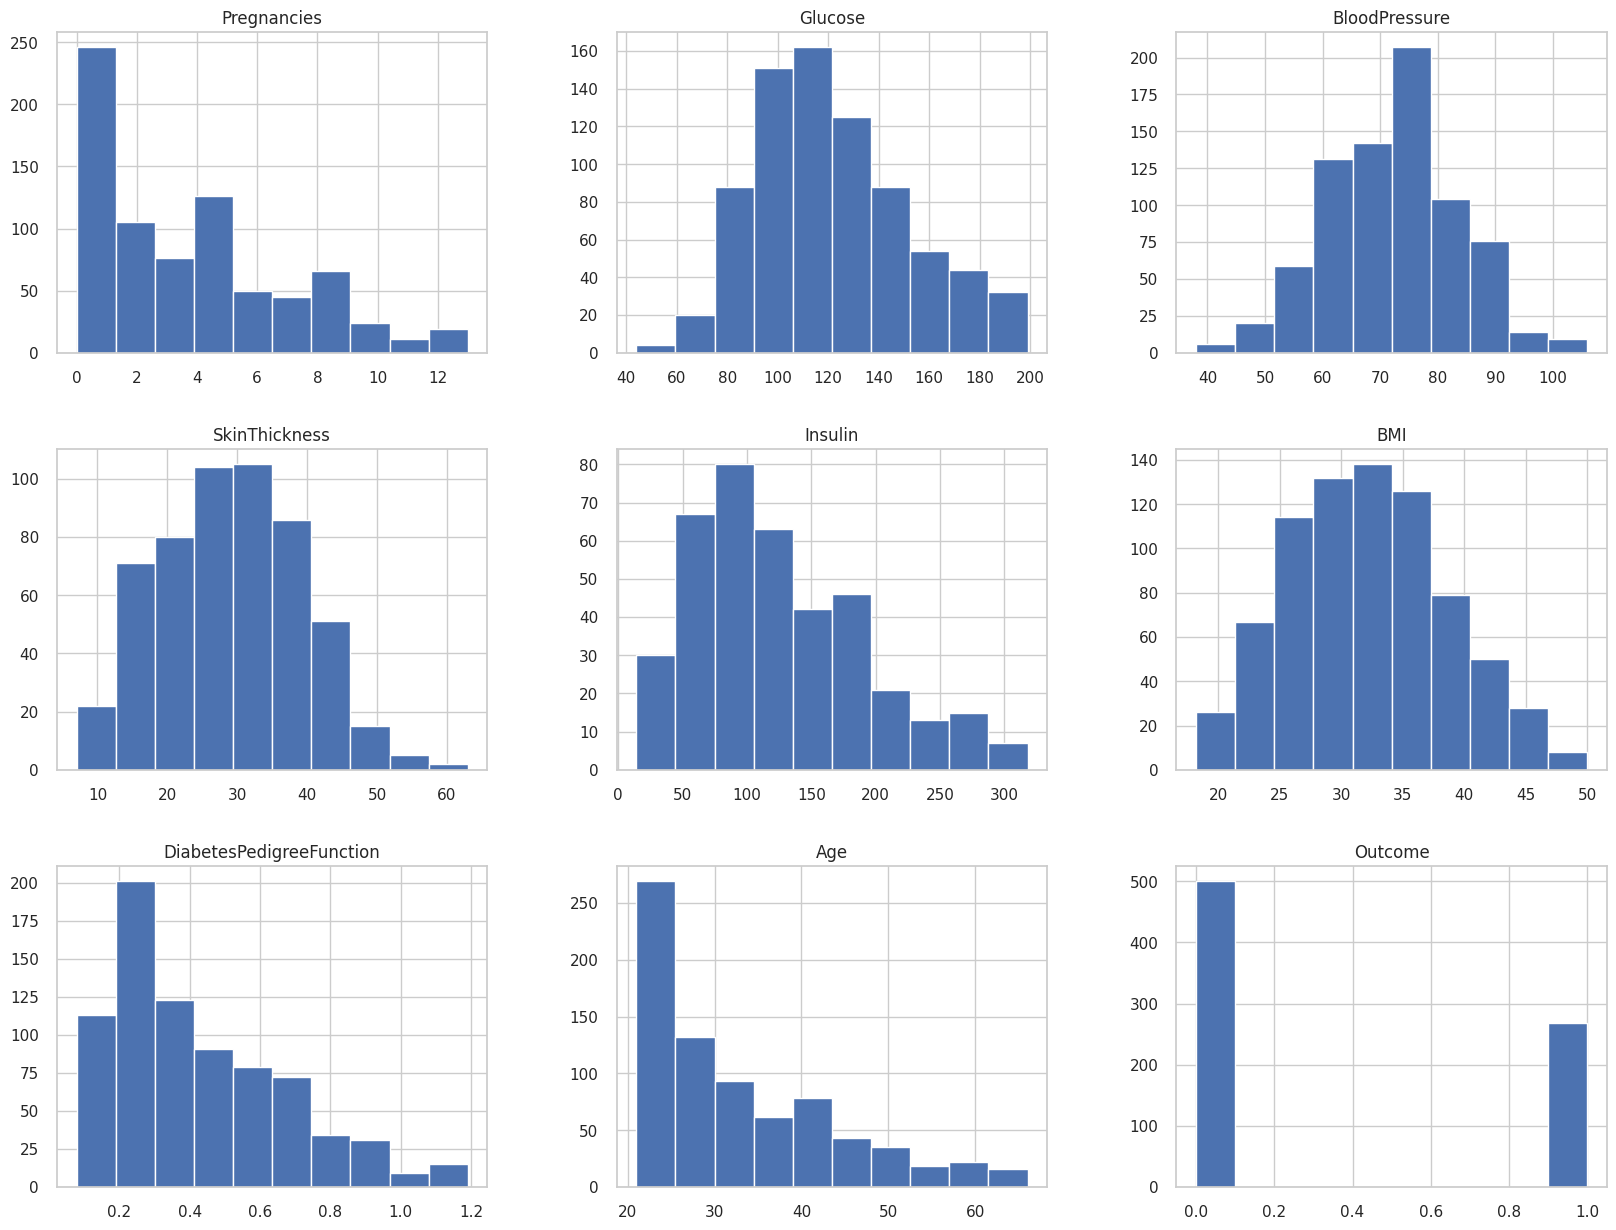

In [ ]:
# Distribusi dataset
df.hist(figsize = (20, 15))
plt.show()

### penjelasan insight
* Pada kolom "Pregnancies", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age" berdistribusi positif skew, perlu penanganan transformasi, bisa gunakan data scaling.

* Pada kolom "Glucose", "BloodPressure" dan "BMI"  mendekati normal.

* Pada kolom "Outcome" kategori biner (0 dan 1)


# Handling Invalid Data

In [ ]:
# Cek Apakah ada missing value pada dataset
missing_value = df.isnull().sum()
print(missing_value)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     384
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Buat variabel dataframe yang dibersihkan
df_cleaned = df.copy()

# Imputasi nilai tidak valid (nan) sesuai distribusi data
df_cleaned['Glucose'].fillna(df_cleaned['Glucose'].mean(), inplace = True)
df_cleaned['BloodPressure'].fillna(df_cleaned['BloodPressure'].mean(), inplace = True)
df_cleaned['SkinThickness'].fillna(df_cleaned['SkinThickness'].median(), inplace = True)
df_cleaned['Insulin'].fillna(df_cleaned['Insulin'].median(), inplace = True)
df_cleaned['BMI'].fillna(df_cleaned['BMI'].median(), inplace = True)

In [ ]:
# Menampilkan 5 baris pertama dataframe
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,114.75,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,114.75,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,114.75,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.00,43.1,0.184,33.0,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


# Exploratory Data Analisis (EDA)

## Imbalance Data

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio
pio.renderers.default = 'colab'

# Asumsikan data = df
data = df

# Fungsi bar chart dengan warna soft
def target_count():
    trace = go.Bar(
        x = data['Outcome'].value_counts().values.tolist(),
        y = ['healthy', 'diabetic'],
        orientation = 'h',
        text = data['Outcome'].value_counts().values.tolist(),
        textfont = dict(size = 15),
        textposition = 'auto',
        opacity = 0.8,
        marker = dict(
            color = ['#a8d5ba', '#f4b6b6'],  # hijau soft dan merah soft
            line = dict(color = '#000000', width = 1.2)
        )
    )

    layout = dict(title = 'Count of Outcome variable')
    fig = dict(data = [trace], layout = layout)
    py.iplot(fig)

# Fungsi pie chart dengan warna soft
def target_percent():
    trace = go.Pie(
        labels = ['healthy', 'diabetic'],
        values = data['Outcome'].value_counts(),
        textfont = dict(size = 15),
        opacity = 0.9,
        marker = dict(
            colors = ['#a8d5ba', '#f4b6b6'],
            line = dict(color = '#000000', width = 1.2)
        )
    )

    layout = dict(title = 'Distribution of Outcome variable')
    fig = dict(data = [trace], layout = layout)
    py.iplot(fig)

In [ ]:
# Memanggil fungsi target
target_count()
target_percent()

### Penjelasan insight
berdasaran grafik visualisasi dapat terlihat bahwa hal tersebut mengalami imbalance data, di mana persentase yang sehat yaitu sebesar 65,1% dan yang terkena diabtes sebesar 34,9%. maka perlu penanganan lebih lanjut untuk imbalance data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Pisahkan fitur dan target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split data (gunakan stratify agar proporsi kelas tetap)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Cek distribusi kelas sebelum SMOTE
print("Distribusi sebelum SMOTE:", np.bincount(y_train))

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("Distribusi setelah SMOTE:", np.bincount(y_train_smote))

# Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Latih model dengan data yang sudah dioversampling
model.fit(X_train_smote, y_train_smote)

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Non-diabetic", "Diabetic"]))

Distribusi sebelum SMOTE: [375 201]
Distribusi setelah SMOTE: [375 375]
Accuracy: 0.75

Confusion Matrix:
 [[97 28]
 [20 47]]

Classification Report:
               precision    recall  f1-score   support

Non-diabetic       0.83      0.78      0.80       125
    Diabetic       0.63      0.70      0.66        67

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.75      0.75       192



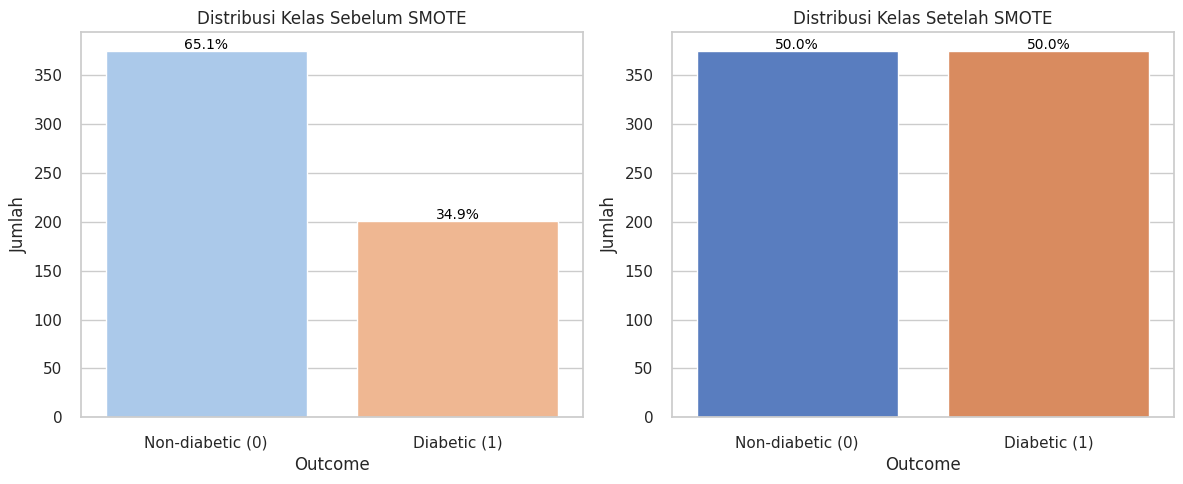

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style="whitegrid")

# Fungsi untuk menambahkan persentase di atas batang
def add_percentage(ax, data):
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 2, percentage, ha='center', fontsize=10, color='black')

# Buat subplot 1x2 untuk before vs after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum SMOTE
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title("Distribusi Kelas Sebelum SMOTE")
axes[0].set_xticklabels(['Non-diabetic (0)', 'Diabetic (1)'])
axes[0].set_ylabel("Jumlah")
add_percentage(axes[0], y_train)

# Setelah SMOTE
sns.countplot(x=y_train_smote, ax=axes[1], palette='muted')
axes[1].set_title("Distribusi Kelas Setelah SMOTE")
axes[1].set_xticklabels(['Non-diabetic (0)', 'Diabetic (1)'])
axes[1].set_ylabel("Jumlah")
add_percentage(axes[1], y_train_smote)

plt.tight_layout()
plt.show()

setelah dilakukannya handling imbalance data menggunakan SMOTE, sekarang data 'target' pada Outcome sudah balance dengan rasio 50:50 yang semula dengan perbandingan rasio 'target' nya yaitu 65,1:34,9.


# Feature Engineering

In [ ]:
df_fe = df.copy()

### Age Category
Age category based on Kemenkes RI: [Age Category Kemenkes RI](https://ayosehat.kemkes.go.id/kategori-usia#:~:text=Masa%20Bayi%20Balita%20adalah%20masa%20setelah%20dilahirkan%20sampai,anak%20usia%20sekolah%20usia%207%20sampai%20usia%2010)

In [ ]:
# Menambahkan kolom kategori usia yang diperbarui
def kategori_usia_baru(age):
    if 5 <= age <= 9:
        return 'Anak-anak'
    elif 10 <= age <= 18:
        return 'Remaja'
    elif 18 < age < 60:
        return 'Dewasa'
    elif age >= 60:
        return 'Lansia'
    else:
        return 'Di bawah 5 tahun'  # jika ada nilai age < 5

# Terapkan ke dataframe (df_fe)
df_fe['Kategori_Usia'] = df_fe['Age'].apply(kategori_usia_baru)

# Menampilkan contoh hasil
print(df_fe[['Age', 'Kategori_Usia']].head())

    Age Kategori_Usia
0  50.0        Dewasa
1  31.0        Dewasa
2  32.0        Dewasa
3  21.0        Dewasa
4  33.0        Dewasa


In [ ]:
df_fe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Kategori_Usia
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1,Dewasa
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0,Dewasa
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1,Dewasa
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Dewasa
4,0.0,137.0,40.0,35.0,168.0,43.1,0.184,33.0,1,Dewasa
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0,Lansia
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0,Dewasa
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0,Dewasa
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1,Dewasa


In [ ]:
df_fe.groupby(['Kategori_Usia', 'Age'])['Outcome'].value_counts()

Kategori_Usia  Age   Outcome
Dewasa         21.0  0          58
                     1           5
               22.0  0          61
                     1          11
               23.0  0          32
                                ..
Lansia         63.0  0           4
               64.0  0           1
               65.0  0           3
               66.0  0           2
                     1           2
Name: count, Length: 94, dtype: int64

### Nutritional Status
Nutritional status based on BMI with WHO references [WHO Nutrisional Status BMI](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)

In [ ]:
# menambahka kolom nutritional_status
nutritional_status = pd.Series([])

# status Nutrisi Berdasarkan BMI
for i in range(len(df_fe)):
  if pd.isna(df_fe['BMI'][i]):
    nutritional_status[i] = 'Unknown'
  elif df_fe['BMI'][i] < 18.5:
    nutritional_status[i] = 'Underweight'
  elif df_fe['BMI'][i] < 25:
    nutritional_status[i] = 'Normal'
  elif df_fe['BMI'][i] < 30:
    nutritional_status[i] = 'Overweight'
  else:
    nutritional_status[i] = 'Obese'

# tambahkan kolom ke df_fe
df_fe.insert(6, "NutritionalStatus", nutritional_status)

In [ ]:
df_fe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome,Kategori_Usia
0,6.0,148.0,72.0,35.0,NaN,33.6,Obese,0.627,50.0,1,Dewasa
1,1.0,85.0,66.0,29.0,NaN,26.6,Overweight,0.351,31.0,0,Dewasa
2,8.0,183.0,64.0,NaN,NaN,23.3,Normal,0.672,32.0,1,Dewasa
3,1.0,89.0,66.0,23.0,94.0,28.1,Overweight,0.167,21.0,0,Dewasa
4,0.0,137.0,40.0,35.0,168.0,43.1,Obese,0.184,33.0,1,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,Obese,0.171,63.0,0,Lansia
764,2.0,122.0,70.0,27.0,NaN,36.8,Obese,0.340,27.0,0,Dewasa
765,5.0,121.0,72.0,23.0,112.0,26.2,Overweight,0.245,30.0,0,Dewasa
766,1.0,126.0,60.0,NaN,NaN,30.1,Obese,0.349,47.0,1,Dewasa


### Blood Pressure Status
Blood Pressure Ranges based on [American Heart Association](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

In [ ]:
import pandas as pd

# Membuat fungsi kategori tekanan darah berdasarkan tekanan diastolik
def categorize_diastolic(bp):
    if bp < 80:
        return 'Normal'
    elif 80 <= bp <= 89:
        return 'Hypertension Stage 1'
    elif 90 <= bp <= 120:
        return 'Hypertension Stage 2'
    elif bp > 120:
        return 'Hypertensive Crisis'
    else:
        return 'Unknown'

# Terapkan fungsi ke kolom BloodPressure dan simpan dalam kolom baru
df_fe['BloodPressure_Status'] = df_fe['BloodPressure'].apply(categorize_diastolic)

# Tampilkan jumlah tiap kategori
print(df_fe['BloodPressure_Status'].value_counts())

BloodPressure_Status
Normal                  565
Hypertension Stage 1    150
Hypertension Stage 2     53
Name: count, dtype: int64


In [ ]:
df_fe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome,Kategori_Usia,BloodPressure_Status
0,6.0,148.0,72.0,35.0,NaN,33.6,Obese,0.627,50.0,1,Dewasa,Normal
1,1.0,85.0,66.0,29.0,NaN,26.6,Overweight,0.351,31.0,0,Dewasa,Normal
2,8.0,183.0,64.0,NaN,NaN,23.3,Normal,0.672,32.0,1,Dewasa,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,Overweight,0.167,21.0,0,Dewasa,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,Obese,0.184,33.0,1,Dewasa,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,Obese,0.171,63.0,0,Lansia,Normal
764,2.0,122.0,70.0,27.0,NaN,36.8,Obese,0.340,27.0,0,Dewasa,Normal
765,5.0,121.0,72.0,23.0,112.0,26.2,Overweight,0.245,30.0,0,Dewasa,Normal
766,1.0,126.0,60.0,NaN,NaN,30.1,Obese,0.349,47.0,1,Dewasa,Normal


In [ ]:
# Jumlah pasien berdasarkan tekanan darah
df_fe.groupby('BloodPressure_Status')['Outcome'].value_counts()

BloodPressure_Status  Outcome
Hypertension Stage 1  0           88
                      1           62
Hypertension Stage 2  0           28
                      1           25
Normal                0          384
                      1          181
Name: count, dtype: int64

# OGTT Result
Oral Glucose Tolerance Test based on [Clinical Practice Guidelines](https://r.search.yahoo.com/_ylt=AwrOuJmx8jNoywMQzQ9XNyoA%3B_ylu=Y29sbwNncTEEcG9zAzcEdnRpZAMEc2VjA3Ny/RV=2/RE=1749444529/RO=10/RU=https%3a%2f%2fkemkes.go.id%2fapp_asset%2ffile_content_download%2f1737347004678dcfbc66f892.86462222.pdf/RK=2/RS=nMnScySU3cE_mhKUCUOwUMA0l9o-.)

In [ ]:
# Membuat kolom OGTTResult berdasarkan nilai Glucose
def categorize_glucose(glucose):
    if pd.isna(glucose):
        return 'Unknown'
    elif glucose < 140:
        return 'Normal'
    elif glucose < 200:
        return 'Impaired Glucose Tolerance'
    else:
        return 'Diabetic Level'

# Terapkan fungsi ke kolom Glucose
df_fe['OGTTResult'] = df_fe['Glucose'].apply(categorize_glucose)

# Jika kamu ingin memasukkan kolom di posisi tertentu (misal ke-2)
df_fe.insert(2, "OGTTResult", df_fe.pop("OGTTResult"))

In [ ]:
df_fe

,Pregnancies,Glucose,OGTTResult,BloodPressure,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome,Kategori_Usia,BloodPressure_Status
0,6.0,148.0,Impaired Glucose Tolerance,72.0,35.0,NaN,33.6,Obese,0.627,50.0,1,Dewasa,Normal
1,1.0,85.0,Normal,66.0,29.0,NaN,26.6,Overweight,0.351,31.0,0,Dewasa,Normal
2,8.0,183.0,Impaired Glucose Tolerance,64.0,NaN,NaN,23.3,Normal,0.672,32.0,1,Dewasa,Normal
3,1.0,89.0,Normal,66.0,23.0,94.0,28.1,Overweight,0.167,21.0,0,Dewasa,Normal
4,0.0,137.0,Normal,40.0,35.0,168.0,43.1,Obese,0.184,33.0,1,Dewasa,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,Normal,76.0,48.0,180.0,32.9,Obese,0.171,63.0,0,Lansia,Normal
764,2.0,122.0,Normal,70.0,27.0,NaN,36.8,Obese,0.340,27.0,0,Dewasa,Normal
765,5.0,121.0,Normal,72.0,23.0,112.0,26.2,Overweight,0.245,30.0,0,Dewasa,Normal
766,1.0,126.0,Normal,60.0,NaN,NaN,30.1,Obese,0.349,47.0,1,Dewasa,Normal


In [ ]:
# Jumlah pasien berdasarkan OGTT
df_fe['OGTTResult'].value_counts()

,count
OGTTResult,
Normal,571
Impaired Glucose Tolerance,197


In [ ]:
# OGTT result berdasarkan outcome
df_fe.groupby('OGTTResult')['Outcome'].value_counts()

OGTTResult                  Outcome
Impaired Glucose Tolerance  1          135
                            0           62
Normal                      0          438
                            1          133
Name: count, dtype: int64

# Correlation Matrix (Cleaned DataFrame)

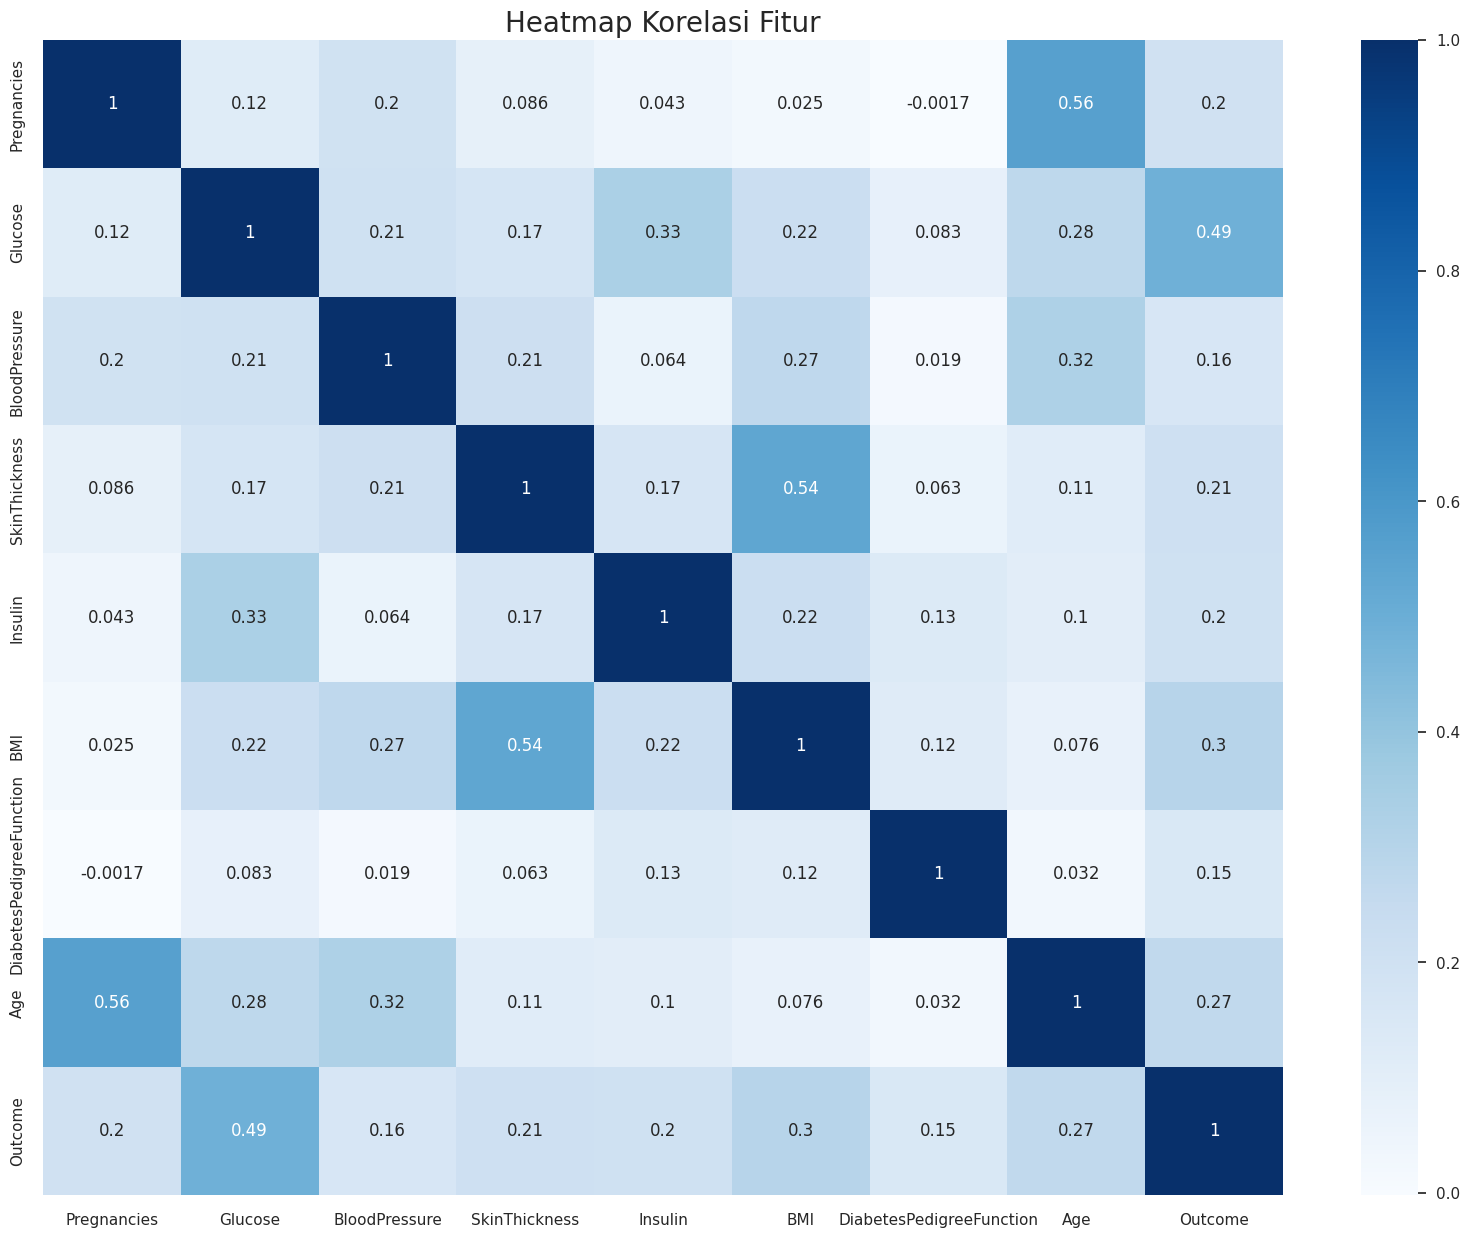

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Fitur', fontsize=20)
plt.show()

# Penjelasan Insight Correlation Matrix
## 1. Fitur yang Paling Berkorelasi dengan "Outcome" (Target/Label):
* Glucose (0.49) → Korelasi paling tinggi dengan Outcome.

* BMI (0.30) → Cukup berpengaruh.

* Age (0.27) → Juga relevan.

* Pregnancies (0.20) → Korelasi rendah, tapi masih ada.

* Sisanya memiliki korelasi lemah (< 0.2), misalnya Insulin (0.20), SkinThickness (0.21), dll.

Kesimpulan: Glukosa, BMI, dan Umur adalah fitur yang paling informatif dalam memprediksi apakah seseorang menderita diabetes (Outcome = 1).


## 2. Korelasi Antar Fitur:
SkinThickness dan BMI (0.54) → Cukup kuat, mungkin mengindikasikan bahwa orang dengan lemak tubuh lebih tinggi cenderung memiliki lapisan kulit lebih tebal.

Pregnancies dan Age (0.56) → Masuk akal; semakin tua, peluang untuk memiliki lebih banyak kehamilan lebih besar.

Korelasi antar fitur penting untuk mendeteksi multikolinearitas saat menggunakan model seperti regresi logistik.

## 3. Fitur yang Hampir Tidak Berkorelasi:
DiabetesPedigreeFunction memiliki korelasi sangat rendah dengan semua fitur lain.

Korelasi negatif sangat kecil atau tidak signifikan (misal, Age dan DiabetesPedigreeFunction = 0.032).



# Modelling Decision Three

## Data Splitting

In [ ]:
# Buat variabel X dan y untuk target data splitting
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [ ]:
# Hitung jumlah data
total_data = df_cleaned.shape[0]
train_data = X_train.shape[0]
test_data = X_test.shape[0]

# Hitung persentase
train_pct = (train_data / total_data) * 100
test_pct = (test_data / total_data) * 100

# Tampilkan hasil
print(f'Jumlah data awal        : {total_data} baris')
print(f'Jumlah data latih       : {train_data} baris ({train_pct:.2f}%)')
print(f'Jumlah data uji         : {test_data} baris ({test_pct:.2f}%)')

Jumlah data awal        : 768 baris
Jumlah data latih       : 537 baris (69.92%)
Jumlah data uji         : 231 baris (30.08%)


# Data Scaling

In [ ]:
# Scaling data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Resampling

In [ ]:
# Cek jumlah outcome pada data latih
y_train.value_counts()

,count
Outcome,
0,349
1,188


Distribusi kelas sebelum resampling:
Outcome
0    349
1    188
Name: count, dtype: int64

Distribusi kelas setelah resampling:
Outcome
0    336
1    336
Name: count, dtype: int64


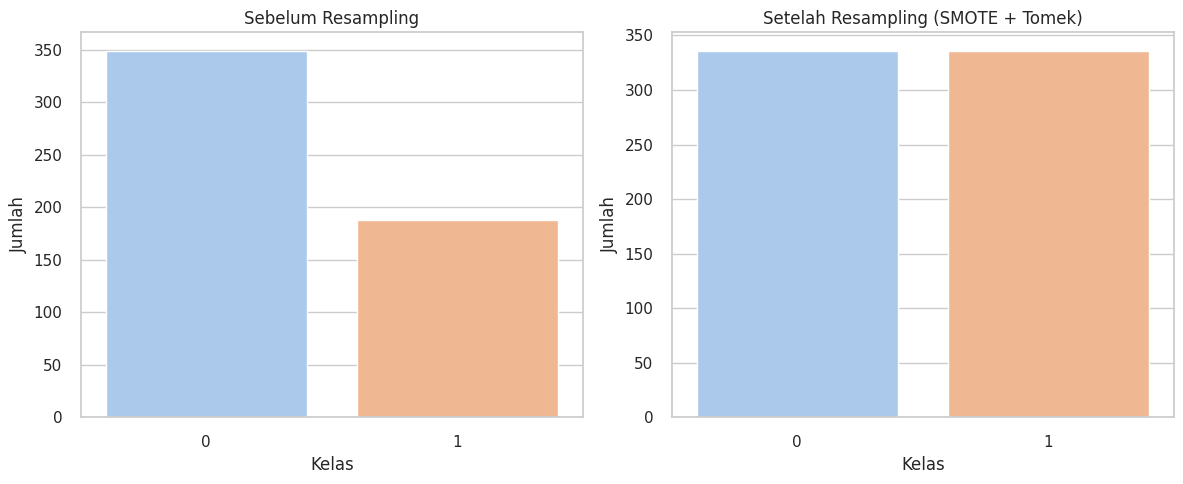

In [ ]:
from imblearn.combine import SMOTETomek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan distribusi kelas sebelum resampling
print("Distribusi kelas sebelum resampling:")
print(pd.Series(y_train).value_counts())

# Lakukan resampling
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

# Tampilkan distribusi kelas setelah resampling
print("\nDistribusi kelas setelah resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Visualisasi distribusi sebelum dan sesudah
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# Sebelum resampling
sns.countplot(x=y_train, ax=axes[0], palette="pastel")
axes[0].set_title("Sebelum Resampling")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah")

# Setelah resampling
sns.countplot(x=y_train_resampled, ax=axes[1], palette="pastel")
axes[1].set_title("Setelah Resampling (SMOTE + Tomek)")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

# Optimalization Hyperparameter Decision Three With Levy Flight-GWO Trial Error Bound Params LGWO (70:30) --> Acc Fitness LGWO 87%

In [ ]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, classification_report
import math
import random

In [ ]:
# Definisi batas pencarian untuk hyperparameter Decision Tree
bounds = {
    'max_depth_idx': (0, 15),        # 0–14 untuk depth 1–15, 15 untuk None
    'criterion_idx': (0, 1),         # 0 = 'gini', 1 = 'entropy'
    'min_samples_split': (2, 40),    # diperluas jadi 2–40
    'min_samples_leaf': (1, 20),     # diperluas jadi 1–20
    'max_features_idx': (0, 2)       # 0 = 'auto', 1 = 'sqrt', 2 = 'log2'
}

# Pemetaan indeks ke nilai hyperparameter sebenarnya
criterion_map = {
    0: 'gini',
    1: 'entropy'
}

criterion_map = {0: 'gini', 1: 'entropy'}
max_features_map = {0: 'auto', 1: 'sqrt', 2: 'log2'}
max_depth_map = {i: i + 1 for i in range(15)}
max_depth_map[15] = None

# Jumlah dimensi ruang pencarian
n_dimensions = len(bounds)

# Urutan nama parameter (untuk referensi indexing)
param_keys = list(bounds.keys())

In [ ]:
# Fungsi Fitness
def evaluate_dt_fitness(params_vector): # Objective function
    max_depth_val = max_depth_map[int(round(params_vector[0]))]
    criterion_val = criterion_map[int(round(params_vector[1]))]
    min_samples_split_val = int(round(params_vector[2]))
    min_samples_leaf_val = int(round(params_vector[3]))

    if min_samples_split_val < 2 * min_samples_leaf_val:
        min_samples_split_val = 2 * min_samples_leaf_val

    min_samples_split_val = np.clip(min_samples_split_val, bounds['min_samples_split'][0], bounds['min_samples_split'][1])
    min_samples_leaf_val = np.clip(min_samples_leaf_val, bounds['min_samples_leaf'][0], bounds['min_samples_leaf'][1])

    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth_val,
        criterion=criterion_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=42,
        class_weight='balanced' # Kasih bobot ke kelas minoritas
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        dt_classifier,
        X_train_resampled,
        y_train_resampled,
        cv=cv,
        scoring='recall',
        n_jobs=-1 # Menjalankan pelatihan dan evaluasi scr paralel
    )

    return np.mean(scores)
    '''
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = dt_classifier.predict(X_train_resampled)
    return recall_score(y_train_resampled, y_pred)'''

In [ ]:
# Implementasi Lévy Flight (Mantegna's Algorithm)
def levy_flight(dim, beta=0.8): # Nilai beta 0 < beta <= 2
    sigma_u = ((math.gamma(1 + beta) * math.sin(math.pi * beta / 2)) /
               (math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)

    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, 1, dim)

    steps = u / (np.abs(v) ** (1 / beta))
    return steps

In [ ]:
# Implementasi Lévy Flight (Mantegna's Algorithm)
def levy_flight(dim, beta=1.5): # Nilai beta 0 < beta <= 2
    sigma_u = ((math.gamma(1 + beta) * math.sin(math.pi * beta / 2)) /
               (math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)

    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, 1, dim)

    steps = u / (np.abs(v) ** (1 / beta))
    return steps

In [ ]:
# Implementasi LGWO
def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.5):
    n_dimensions = len(bounds)
    lower_bound = np.array([b[0] for b in bounds.values()])
    upper_bound = np.array([b[1] for b in bounds.values()])

    # Inisialisasi posisi serigala menggunakan Lévy Flight
    positions = np.zeros((n_wolves, n_dimensions))
    for i in range(n_wolves):

        # Skala langkah Levy flight agar sesuai dengan rentang pencarian
        levy_steps = levy_flight(n_dimensions) * (upper_bound - lower_bound) * 0.1 # Kecilkan faktor untuk inisialisasi

        # Mulai dari titik acak dalam batas, lalu tambahkan perturbasi Levy
        initial_random_pos = lower_bound + np.random.rand(n_dimensions) * (upper_bound - lower_bound)
        positions[i, :] = initial_random_pos + levy_steps

        positions[i, :] = np.clip(positions[i, :], lower_bound, upper_bound)

    # Hitung fitness awal untuk setiap serigala
    wolf_fitnesses = np.array([objective_function(pos) for pos in positions])

    # Identifikasi 2 serigala terbaik dari populasi awal
    sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

    alpha_idx = sorted_indices[0]
    alpha_pos = np.copy(positions[alpha_idx, :])
    alpha_fitness = wolf_fitnesses[alpha_idx]

    beta_idx = sorted_indices[1]
    beta_pos = np.copy(positions[beta_idx, :])
    beta_fitness = wolf_fitnesses[beta_idx]

    convergence_curve = []
    all_solutions = []

    for iteration in range(max_iter):
        a = 1.5 - iteration * (1.5 / max_iter) # Parameter 'a' dari a0 ke 0

        for i in range(n_wolves):
            current_pos = np.copy(positions[i, :])
            current_fitness = wolf_fitnesses[i]
            X_new_t = np.zeros(n_dimensions)

            # Update posisi
            for d in range(n_dimensions):
                r1 = random.random()
                r2 = random.random()
                A1 = 2 * a * r1 - a
                A2 = 2 * a * r2 - a
                C1 = 2 * random.random()
                C2 = 2 * random.random()

                D_alpha = abs(C1 * alpha_pos[d] - current_pos[d])
                D_beta = abs(C2 * beta_pos[d] - current_pos[d])
                X1 = alpha_pos[d] - A1 * D_alpha
                X2 = beta_pos[d] - A2 * D_beta

                # Asumsi: `|A|` = `|A1|`
                if abs(A1) > 0.5:
                    # KASUS: |A| > 0.5 (Eksplorasi, dengan Lévy Flight)
                    levy_step_val = levy_flight(n_dimensions) * np.random.normal(0, 1, n_dimensions)
                    X_new_t[d] = 0.5 * (X1 + X2) + levy_step_val[d]
                else:
                    # KASUS: |A| <= 0.5 (Eksploitasi, GWO standar)
                    X_new_t[d] = 0.5 * (X1 + X2)

                # Pastikan X_new_t tetap dalam batas
                X_new_t[d] = np.clip(X_new_t[d], lower_bound[d], upper_bound[d])

            # Evaluasi fitness dari X_new_t
            X_new_t_eval = np.copy(X_new_t)
            X_new_t_eval = np.round(X_new_t_eval).astype(int)

            if X_new_t_eval[2] < 2 * X_new_t_eval[3]:
                X_new_t_eval[2] = 2 * X_new_t_eval[3]

            X_new_t_eval[0] = np.clip(X_new_t_eval[0], *bounds['max_depth_idx'])
            X_new_t_eval[1] = np.clip(X_new_t_eval[1], *bounds['criterion_idx'])
            X_new_t_eval[2] = np.clip(X_new_t_eval[2], *bounds['min_samples_split'])
            X_new_t_eval[3] = np.clip(X_new_t_eval[3], *bounds['min_samples_leaf'])

            fitness_new = objective_function(X_new_t_eval)
            r_new = random.random() # Random number for greedy selection

            # Greedy selection
            if (fitness_new > current_fitness) and (r_new >= p_greedy_selection):
                positions[i, :] = np.copy(X_new_t) # Update posisi
                wolf_fitnesses[i] = fitness_new # Update fitness
            else:
                pass

            # Simpan hasil untuk rangkuman (setelah GS)
            solution_details = {
                'Iteration': iteration,
                'Wolf_ID': i,
                'max_depth': max_depth_map.get(int(round(positions[i, 0])), None),
                'criterion': criterion_map[int(round(positions[i, 1]))] if int(round(positions[i, 1])) in criterion_map else 'unknown',
                'min_samples_split': int(round(positions[i, 2])),
                'min_samples_leaf': int(round(positions[i, 3])),
                'Fitness': wolf_fitnesses[i]
            }
            all_solutions.append(solution_details)

        # Update X_alpha and X_beta berdasarkan fitness terbaru dari populasi
        sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

        alpha_idx = sorted_indices[0]
        alpha_pos = np.copy(positions[alpha_idx, :])
        alpha_fitness = wolf_fitnesses[alpha_idx]

        # Elitism - always preserve alpha
        positions[alpha_idx, :] = alpha_pos
        wolf_fitnesses[alpha_idx] = alpha_fitness

        convergence_curve.append(alpha_fitness)

        # Hanya cetak setiap kelipatan 10 untuk max iterasi banyak
        if (iteration + 1) % 10 == 0 or (iteration + 1) == max_iter:
            print(f"Iteration {iteration+1}/{max_iter}, Best Recall: {alpha_fitness:.4f}")
        #print(f"Iteration {iteration+1}/{max_iterations}, Best Recall (alpha): {alpha_fitness:.4f}")

    return alpha_pos, alpha_fitness, convergence_curve, pd.DataFrame(all_solutions)

In [ ]:
n_wolves = 40
max_iterations = 100
p_greedy_selection = 0.6 # Probabilitas 'p' untuk Greedy Selection (Eq. 21)

print("\nLGWO starting...")
best_params_vector, best_fitness, convergence_curve, all_evaluated_solutions = lgwo(
    objective_function=evaluate_dt_fitness,
    bounds=bounds,
    n_wolves=n_wolves,
    max_iter=max_iterations,
    p_greedy_selection=p_greedy_selection
)

In [ ]:
import numpy as np
import pandas as pd
import random
import math

def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.5, verbose=True):
    """
    Lévy Grey Wolf Optimizer (LGWO) untuk optimisasi hyperparameter.

    Parameters:
    - objective_function: fungsi yang ingin dimaksimalkan (return scalar)
    - bounds             : dictionary berisi batas pencarian tiap parameter
    - n_wolves           : jumlah serigala dalam populasi
    - max_iter           : jumlah iterasi maksimal
    - p_greedy_selection : probabilitas minimum untuk melakukan greedy selection
    - verbose            : cetak hasil iterasi jika True

    Returns:
    - alpha_pos          : posisi terbaik (solusi optimal)
    - alpha_fitness      : nilai fitness terbaik
    - convergence_curve  : list nilai fitness terbaik per iterasi
    - all_solutions_df   : DataFrame log semua solusi tiap iterasi
    """

    n_dimensions = len(bounds)
    lower_bound = np.array([b[0] for b in bounds.values()])
    upper_bound = np.array([b[1] for b in bounds.values()])

    # Inisialisasi posisi awal menggunakan Lévy Flight
    positions = np.zeros((n_wolves, n_dimensions))
    for i in range(n_wolves):
        levy_steps = levy_flight(n_dimensions) * (upper_bound - lower_bound) * 0.1
        random_start = lower_bound + np.random.rand(n_dimensions) * (upper_bound - lower_bound)
        positions[i, :] = np.clip(random_start + levy_steps, lower_bound, upper_bound)

    # Evaluasi fitness awal
    wolf_fitnesses = np.array([objective_function(np.round(pos).astype(int)) for pos in positions])
    sorted_indices = np.argsort(wolf_fitnesses)[::-1]

    alpha_idx = sorted_indices[0]
    beta_idx = sorted_indices[1]

    alpha_pos = np.copy(positions[alpha_idx])
    alpha_fitness = wolf_fitnesses[alpha_idx]
    beta_pos = np.copy(positions[beta_idx])
    beta_fitness = wolf_fitnesses[beta_idx]

    convergence_curve = []
    all_solutions = []

    for iteration in range(max_iter):
        a = 1.5 - iteration * (1.5 / max_iter)

        for i in range(n_wolves):
            current_pos = np.copy(positions[i])
            current_fitness = wolf_fitnesses[i]
            new_position = np.zeros(n_dimensions)

            for d in range(n_dimensions):
                r1, r2 = random.random(), random.random()
                A1, A2 = 2 * a * r1 - a, 2 * a * r2 - a
                C1, C2 = 2 * random.random(), 2 * random.random()

                D_alpha = abs(C1 * alpha_pos[d] - current_pos[d])
                D_beta = abs(C2 * beta_pos[d] - current_pos[d])
                X1 = alpha_pos[d] - A1 * D_alpha
                X2 = beta_pos[d] - A2 * D_beta

                if abs(A1) > 0.5:
                    levy_step_val = levy_flight(n_dimensions) * np.random.normal(0, 1, n_dimensions)
                    new_position[d] = 0.5 * (X1 + X2) + levy_step_val[d]
                else:
                    new_position[d] = 0.5 * (X1 + X2)

                new_position[d] = np.clip(new_position[d], lower_bound[d], upper_bound[d])

            # Koreksi posisi dan hitung fitness
            eval_position = np.round(new_position).astype(int)
            eval_position[2] = max(eval_position[2], 2 * eval_position[3])  # Constraint min_samples_split ≥ 2*min_samples_leaf

            # Clamp ulang
            eval_position[0] = np.clip(eval_position[0], *bounds['max_depth_idx'])
            eval_position[1] = np.clip(eval_position[1], *bounds['criterion_idx'])
            eval_position[2] = np.clip(eval_position[2], *bounds['min_samples_split'])
            eval_position[3] = np.clip(eval_position[3], *bounds['min_samples_leaf'])

            fitness_new = objective_function(eval_position)
            r_new = random.random()

            if (fitness_new > current_fitness) and (r_new >= p_greedy_selection):
                positions[i, :] = np.copy(new_position)
                wolf_fitnesses[i] = fitness_new

            # Simpan solusi iterasi ini
            solution_details = {
                'Iteration': iteration + 1,
                'Wolf_ID': i,
                'max_depth': max_depth_map.get(int(round(positions[i, 0])), None),
                'criterion': criterion_map.get(int(round(positions[i, 1])), 'unknown'),
                'min_samples_split': int(round(positions[i, 2])),
                'min_samples_leaf': int(round(positions[i, 3])),
                'Fitness': wolf_fitnesses[i]
            }
            all_solutions.append(solution_details)

        # Update alpha dan beta
        sorted_indices = np.argsort(wolf_fitnesses)[::-1]
        alpha_idx = sorted_indices[0]
        beta_idx = sorted_indices[1]
        alpha_pos = np.copy(positions[alpha_idx])
        alpha_fitness = wolf_fitnesses[alpha_idx]
        beta_pos = np.copy(positions[beta_idx])
        beta_fitness = wolf_fitnesses[beta_idx]

        convergence_curve.append(alpha_fitness)
        if verbose and ((iteration + 1) % 10 == 0 or iteration == max_iter - 1):
            print(f"Iteration {iteration+1}/{max_iter} | Best Recall: {alpha_fitness:.4f}")

    return alpha_pos, alpha_fitness, convergence_curve, pd.DataFrame(all_solutions)

In [ ]:
def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.6, beta=1.5):
    import numpy as np
    import pandas as pd

    param_keys = list(bounds.keys())
    n_dimensions = len(param_keys)

    lower_bounds = np.array([bounds[k][0] for k in param_keys])
    upper_bounds = np.array([bounds[k][1] for k in param_keys])

    positions = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(n_wolves, n_dimensions))
    fitness = np.zeros(n_wolves)

    for i in range(n_wolves):
        fitness[i] = objective_function(positions[i])

    alpha_idx = np.argmax(fitness)
    alpha_pos = positions[alpha_idx].copy()
    alpha_score = fitness[alpha_idx]

    convergence_curve = [alpha_score]
    all_evaluated = [(positions[i], fitness[i]) for i in range(n_wolves)]

    for t in range(max_iter):
        a = 2 - 2 * (t / max_iter)

        for i in range(n_wolves):
            new_position = positions[i].copy()

            if np.random.rand() < p_greedy_selection:
                step = levy_flight(dim=n_dimensions, beta=beta)
                new_position += step * (alpha_pos - positions[i])
            else:
                for d in range(n_dimensions):
                    r1, r2 = np.random.rand(), np.random.rand()
                    A = 2 * a * r1 - a
                    C = 2 * r2
                    D_alpha = abs(C * alpha_pos[d] - positions[i][d])
                    new_position[d] = alpha_pos[d] - A * D_alpha

            new_position = np.clip(new_position, lower_bounds, upper_bounds)
            new_fitness = objective_function(new_position)

            if new_fitness > fitness[i]:
                positions[i] = new_position
                fitness[i] = new_fitness
                if new_fitness > alpha_score:
                    alpha_pos = new_position.copy()
                    alpha_score = new_fitness

            all_evaluated.append((new_position.copy(), new_fitness))

        convergence_curve.append(alpha_score)

    evaluated_df = pd.DataFrame([
        dict(zip(param_keys, pos)) | {"recall": fit}
        for pos, fit in all_evaluated
    ])

    return alpha_pos, alpha_score, convergence_curve, evaluated_df

In [ ]:
n_wolves = 40
max_iterations = 100
p_greedy_selection = 0.7 # Probabilitas 'p' untuk Greedy Selection (Eq. 21)

print("\nLGWO Optimizer is starting...")
best_params_vector, best_fitness, convergence_curve, all_evaluated_solutions = lgwo(
    objective_function=evaluate_dt_fitness,
    bounds=bounds,
    n_wolves=n_wolves,
    max_iter=max_iterations,
    p_greedy_selection=p_greedy_selection
)


LGWO Optimizer is starting...
Iteration 10/100, Best Recall: 0.8770
Iteration 20/100, Best Recall: 0.8770
Iteration 30/100, Best Recall: 0.8770
Iteration 40/100, Best Recall: 0.8770
Iteration 50/100, Best Recall: 0.8770
Iteration 60/100, Best Recall: 0.8770
Iteration 70/100, Best Recall: 0.8770
Iteration 80/100, Best Recall: 0.8770
Iteration 90/100, Best Recall: 0.8770
Iteration 100/100, Best Recall: 0.8770


# *Grey Wolf Optimizer* (GWO) Combined With *Levy Flight* for DT Model (70:30) --> So Far Best (Acc Fitness LGWO 93%)


In [ ]:
# Definisi batas pencarian untuk hyperparameter Decision Tree
param_bounds = {
    'max_depth_idx': (0, 12),        # 0–11 untuk depth 1–12, 12 untuk None
    'criterion_idx': (0, 1),         # 0 = 'gini', 1 = 'entropy'
    'min_samples_split': (10, 30),   # Integer antara 10 dan 30
    'min_samples_leaf': (5, 15)      # Integer antara 5 dan 15
}

# Pemetaan indeks ke nilai hyperparameter sebenarnya
criterion_map = {
    0: 'gini',
    1: 'entropy'
}

max_depth_map = {i: i + 1 for i in range(12)}  # 0 -> 1, ..., 11 -> 12
max_depth_map[12] = None                       # 12 -> None (tanpa batas depth)

# Jumlah dimensi ruang pencarian
n_dimensions = len(param_bounds)

# Urutan nama parameter (untuk referensi indexing)
param_keys = list(param_bounds.keys())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

def evaluate_dt_fitness(params_vector):
    """
    Objective function untuk mengoptimalkan Decision Tree dengan metric recall.

    Parameters:
    - params_vector: list atau array [max_depth_idx, criterion_idx, min_samples_split, min_samples_leaf]

    Returns:
    - Mean recall score dari cross-validation
    """

    # Konversi parameter dari bentuk indeks ke nilai sebenarnya
    max_depth_val = max_depth_map.get(int(round(params_vector[0])), None)
    criterion_val = criterion_map.get(int(round(params_vector[1])), 'gini')
    min_samples_split_val = int(round(params_vector[2]))
    min_samples_leaf_val = int(round(params_vector[3]))

    # Validasi agar min_samples_split >= 2 * min_samples_leaf
    if min_samples_split_val < 2 * min_samples_leaf_val:
        min_samples_split_val = 2 * min_samples_leaf_val

    # Clamp nilai agar tetap dalam batasan yang ditentukan
    min_samples_split_val = np.clip(min_samples_split_val, *bounds['min_samples_split'])
    min_samples_leaf_val = np.clip(min_samples_leaf_val, *bounds['min_samples_leaf'])

    # Inisialisasi classifier
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth_val,
        criterion=criterion_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=42,
        class_weight='balanced'  # Untuk menangani class imbalance
    )

    # Cross-validation (Stratified untuk menjaga distribusi kelas)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        dt_classifier,
        X_train_resampled,
        y_train_resampled,
        cv=cv,
        scoring='recall',
        n_jobs=-1  # Parallel processing
    )

    # Return mean recall
    return np.mean(scores)

In [ ]:
def levy_flight(dim, beta=0.8):
    """
    Menghasilkan langkah Lévy Flight menggunakan algoritma Mantegna.

    Parameters:
    - dim  : jumlah dimensi (int)
    - beta : parameter distribusi Lévy (float), 0 < beta <= 2

    Returns:
    - steps: array NumPy berisi nilai langkah Lévy untuk tiap dimensi
    """
    # Validasi beta
    if not (0 < beta <= 2):
        raise ValueError("Beta harus berada dalam rentang (0, 2].")

    # Hitung sigma untuk distribusi u (Lévy stable)
    sigma_u = ((math.gamma(1 + beta) * math.sin(math.pi * beta / 2)) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)

    # Sampling dari distribusi normal
    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, 1, dim)

    # Langkah Lévy
    steps = u / (np.abs(v) ** (1 / beta))

    return steps

In [ ]:
import numpy as np
import pandas as pd
import random
import math

def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.5, verbose=True):
    """
    Lévy Grey Wolf Optimizer (LGWO) untuk optimisasi hyperparameter.

    Parameters:
    - objective_function: fungsi yang ingin dimaksimalkan (return scalar)
    - bounds             : dictionary berisi batas pencarian tiap parameter
    - n_wolves           : jumlah serigala dalam populasi
    - max_iter           : jumlah iterasi maksimal
    - p_greedy_selection : probabilitas minimum untuk melakukan greedy selection
    - verbose            : cetak hasil iterasi jika True

    Returns:
    - alpha_pos          : posisi terbaik (solusi optimal)
    - alpha_fitness      : nilai fitness terbaik
    - convergence_curve  : list nilai fitness terbaik per iterasi
    - all_solutions_df   : DataFrame log semua solusi tiap iterasi
    """

    n_dimensions = len(bounds)
    lower_bound = np.array([b[0] for b in bounds.values()])
    upper_bound = np.array([b[1] for b in bounds.values()])

    # Inisialisasi posisi awal menggunakan Lévy Flight
    positions = np.zeros((n_wolves, n_dimensions))
    for i in range(n_wolves):
        levy_steps = levy_flight(n_dimensions) * (upper_bound - lower_bound) * 0.1
        random_start = lower_bound + np.random.rand(n_dimensions) * (upper_bound - lower_bound)
        positions[i, :] = np.clip(random_start + levy_steps, lower_bound, upper_bound)

    # Evaluasi fitness awal
    wolf_fitnesses = np.array([objective_function(np.round(pos).astype(int)) for pos in positions])
    sorted_indices = np.argsort(wolf_fitnesses)[::-1]

    alpha_idx = sorted_indices[0]
    beta_idx = sorted_indices[1]

    alpha_pos = np.copy(positions[alpha_idx])
    alpha_fitness = wolf_fitnesses[alpha_idx]
    beta_pos = np.copy(positions[beta_idx])
    beta_fitness = wolf_fitnesses[beta_idx]

    convergence_curve = []
    all_solutions = []

    for iteration in range(max_iter):
        a = 1.5 - iteration * (1.5 / max_iter)

        for i in range(n_wolves):
            current_pos = np.copy(positions[i])
            current_fitness = wolf_fitnesses[i]
            new_position = np.zeros(n_dimensions)

            for d in range(n_dimensions):
                r1, r2 = random.random(), random.random()
                A1, A2 = 2 * a * r1 - a, 2 * a * r2 - a
                C1, C2 = 2 * random.random(), 2 * random.random()

                D_alpha = abs(C1 * alpha_pos[d] - current_pos[d])
                D_beta = abs(C2 * beta_pos[d] - current_pos[d])
                X1 = alpha_pos[d] - A1 * D_alpha
                X2 = beta_pos[d] - A2 * D_beta

                if abs(A1) > 0.5:
                    levy_step_val = levy_flight(n_dimensions) * np.random.normal(0, 1, n_dimensions)
                    new_position[d] = 0.5 * (X1 + X2) + levy_step_val[d]
                else:
                    new_position[d] = 0.5 * (X1 + X2)

                new_position[d] = np.clip(new_position[d], lower_bound[d], upper_bound[d])

            # Koreksi posisi dan hitung fitness
            eval_position = np.round(new_position).astype(int)
            eval_position[2] = max(eval_position[2], 2 * eval_position[3])  # Constraint min_samples_split ≥ 2*min_samples_leaf

            # Clamp ulang
            eval_position[0] = np.clip(eval_position[0], *bounds['max_depth_idx'])
            eval_position[1] = np.clip(eval_position[1], *bounds['criterion_idx'])
            eval_position[2] = np.clip(eval_position[2], *bounds['min_samples_split'])
            eval_position[3] = np.clip(eval_position[3], *bounds['min_samples_leaf'])

            fitness_new = objective_function(eval_position)
            r_new = random.random()

            if (fitness_new > current_fitness) and (r_new >= p_greedy_selection):
                positions[i, :] = np.copy(new_position)
                wolf_fitnesses[i] = fitness_new

            # Simpan solusi iterasi ini
            solution_details = {
                'Iteration': iteration + 1,
                'Wolf_ID': i,
                'max_depth': max_depth_map.get(int(round(positions[i, 0])), None),
                'criterion': criterion_map.get(int(round(positions[i, 1])), 'unknown'),
                'min_samples_split': int(round(positions[i, 2])),
                'min_samples_leaf': int(round(positions[i, 3])),
                'Fitness': wolf_fitnesses[i]
            }
            all_solutions.append(solution_details)

        # Update alpha dan beta
        sorted_indices = np.argsort(wolf_fitnesses)[::-1]
        alpha_idx = sorted_indices[0]
        beta_idx = sorted_indices[1]
        alpha_pos = np.copy(positions[alpha_idx])
        alpha_fitness = wolf_fitnesses[alpha_idx]
        beta_pos = np.copy(positions[beta_idx])
        beta_fitness = wolf_fitnesses[beta_idx]

        convergence_curve.append(alpha_fitness)
        if verbose and ((iteration + 1) % 10 == 0 or iteration == max_iter - 1):
            print(f"Iteration {iteration+1}/{max_iter} | Best Recall: {alpha_fitness:.4f}")

    return alpha_pos, alpha_fitness, convergence_curve, pd.DataFrame(all_solutions)


 LGWO Optimization starting...
Iteration 10/50 | Best Recall: 0.9345
Iteration 20/50 | Best Recall: 0.9345
Iteration 30/50 | Best Recall: 0.9345
Iteration 40/50 | Best Recall: 0.9345
Iteration 50/50 | Best Recall: 0.9345

 Best Parameters Found:
  max_depth         : 3
  criterion         : entropy
  min_samples_split : 19
  min_samples_leaf  : 6
  Best Recall Score : 0.9345


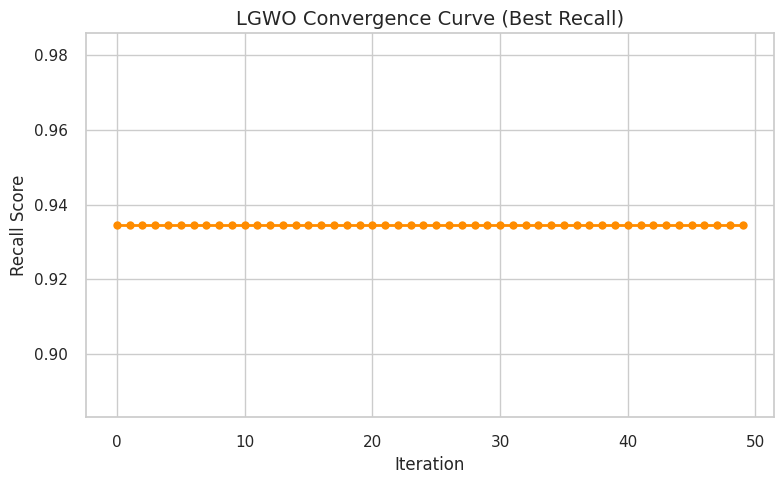

In [ ]:
# Parameter LGWO
n_wolves = 60
max_iterations = 50
p_greedy_selection = 0.6  # Probabilitas greedy selection

print("\n LGWO Optimization starting...")

# Jalankan LGWO
best_params_vector, best_fitness, convergence_curve, all_evaluated_solutions = lgwo(
    objective_function=evaluate_dt_fitness,
    bounds=param_bounds,
    n_wolves=n_wolves,
    max_iter=max_iterations,
    p_greedy_selection=p_greedy_selection
)

# Mapping kembali ke parameter Decision Tree
best_max_depth = max_depth_map.get(int(round(best_params_vector[0])), None)
best_criterion = criterion_map.get(int(round(best_params_vector[1])), 'unknown')
best_min_samples_split = int(round(best_params_vector[2]))
best_min_samples_leaf = int(round(best_params_vector[3]))

# Tampilkan hasil akhir
print("\n Best Parameters Found:")
print(f"  max_depth         : {best_max_depth}")
print(f"  criterion         : {best_criterion}")
print(f"  min_samples_split : {best_min_samples_split}")
print(f"  min_samples_leaf  : {best_min_samples_leaf}")
print(f"  Best Recall Score : {best_fitness:.4f}")

# Visualisasi kurva konvergensi
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(convergence_curve, color='darkorange', linewidth=2, marker='o')
plt.title('LGWO Convergence Curve (Best Recall)', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Recall Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# (Opsional) Simpan hasil evaluasi semua solusi ke CSV
all_evaluated_solutions.to_csv("lgwo_solutions_log.csv", index=False)

In [ ]:
# Rangkuman Evaluasi Seluruh Kombinasi
print("\n Top 10 Kombinasi Parameter Berdasarkan Fitness (Recall)")

# Sortir berdasarkan skor fitness tertinggi
all_evaluated_solutions_sorted = all_evaluated_solutions.sort_values(by='Fitness', ascending=False)

# Tampilkan 10 solusi terbaik
top_10_solutions = all_evaluated_solutions_sorted.head(10)
print(top_10_solutions.to_string(index=False))



 Top 10 Kombinasi Parameter Berdasarkan Fitness (Recall)
 Iteration  Wolf_ID  max_depth criterion  min_samples_split  min_samples_leaf  Fitness
        50       59        3.0   entropy                 19                 5  0.93446
        50       58        3.0   entropy                 27                 6  0.93446
        50       57        3.0   entropy                 19                 5  0.93446
        50       56        3.0   entropy                 27                 5  0.93446
        50       39        3.0   entropy                 23                 5  0.93446
        50       38        3.0   entropy                 18                 6  0.93446
        50       37        3.0   entropy                 25                 5  0.93446
        50       36        3.0   entropy                 12                 5  0.93446
        50       35        3.0   entropy                 19                 5  0.93446
        50       34        3.0   entropy                 10             

In [ ]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Jumlah Data Latih")
    plt.ylabel("Recall Score")
    plt.grid(True)

    # Hitung nilai learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, scoring='recall'
    )

    # Rata-rata dan standar deviasi dari hasil
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Area ketidakpastian
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="salmon")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="lightgreen")

    # Garis performa
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Recall (Data Latih)")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Recall (Validasi Silang)")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

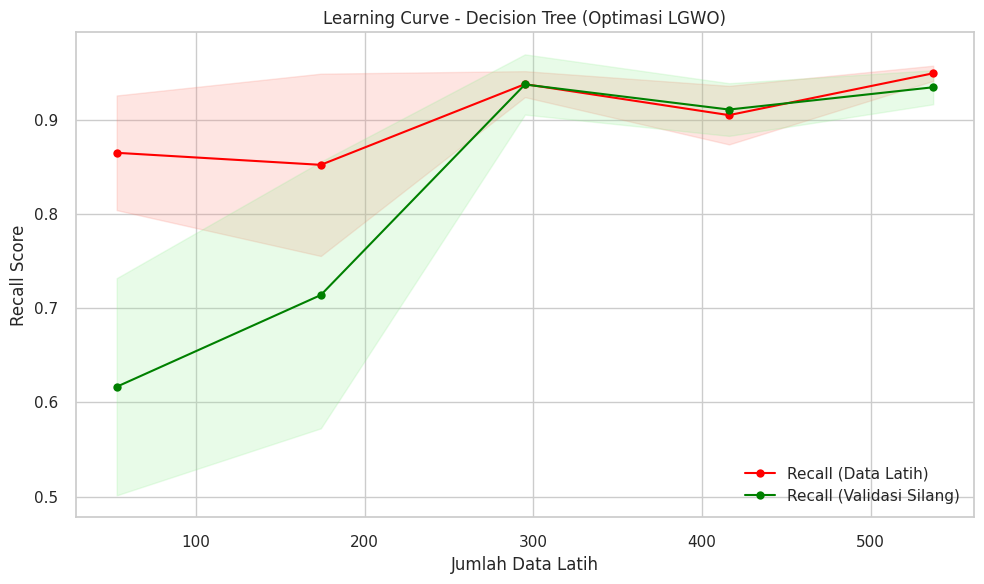

In [ ]:
# Buat model Decision Tree dengan hyperparameter terbaik dari LGWO
dt_best = DecisionTreeClassifier(
    max_depth=best_max_depth,
    criterion=best_criterion,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42,
    class_weight='balanced'
)

# Judul learning curve
title = "Learning Curve - Decision Tree (Optimasi LGWO)"

# Tampilkan learning curve menggunakan data latih yang sudah di-resample & scaled
plot_learning_curve(
    estimator=dt_best,
    X=X_train_resampled,
    y=y_train_resampled,
    title=title,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

## Hasil Modelling DT with LGWO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi model dengan parameter terbaik (misalnya dari LGWO)
dt_best = DecisionTreeClassifier(
    max_depth=best_max_depth,
    criterion=best_criterion,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42,
    class_weight='balanced'
)

# Training model pada data train yang sudah di-resample dan di-scale
dt_best.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data test yang sudah di-scale
y_pred = dt_best.predict(X_test_scaled)

# Cetak classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)


 Classification Report:
              precision    recall  f1-score   support

           0     0.9029    0.6200    0.7352       150
           1     0.5547    0.8765    0.6794        81

    accuracy                         0.7100       231
   macro avg     0.7288    0.7483    0.7073       231
weighted avg     0.7808    0.7100    0.7156       231



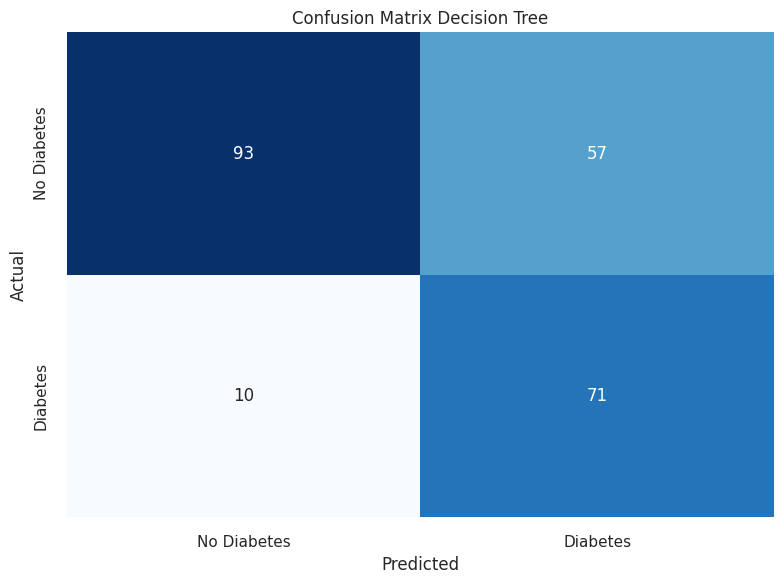

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)

# Plot heatmap dengan warna biru
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['No Diabetes', 'Diabetes'],
                 yticklabels=['No Diabetes', 'Diabetes'],
                 cbar=False,
                 linewidths=0,
                 linecolor='white')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')

# Hilangkan garis tepi heatmap
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

True Negatives (TN) = 93 → Model memprediksi "No Diabetes" dengan benar.

False Positives (FP) = 57 → Model memprediksi "Diabetes" padahal sebenarnya "No Diabetes".

False Negatives (FN) = 10 → Model memprediksi "No Diabetes" padahal sebenarnya "Diabetes".

True Positives (TP) = 71 → Model memprediksi "Diabetes" dengan benar.



# LGWO Params Modify (60:40) Data Splitting --> Acc Fitness LGWO 88%

## Data Splitting (60:40)

In [ ]:
from sklearn.model_selection import train_test_split

# Buat variabel X untuk 8 fitur dan y untuk target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.4,
    random_state = 42
)

In [ ]:
# Jumlah data hasil split
print(f'Jumlah data awal        : {df_cleaned.shape[0]} baris')
print(f'Jumlah data latih (80%) : {X_train.shape[0]} baris')
print(f'Jumlah data uji (20%)   : {X_test.shape[0]} baris')

Jumlah data awal        : 768 baris
Jumlah data latih (80%) : 460 baris
Jumlah data uji (20%)   : 308 baris


## Data Scaling

In [ ]:
# Scaling data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Resampling

In [ ]:
# Cek jumlah outcome data latih
y_train.value_counts()

,count
Outcome,
0,294
1,166


In [ ]:
# Handle imbalanced data dengan pendekatan hybrid (kombinasi oversampling dan undersampling)
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

In [ ]:
# Cek target
y_train_resampled.value_counts()

,count
Outcome,
0,284
1,284


## LGWO Modify

In [ ]:
# Definisi ruang pencarian hyperparameter
bounds = {
    'max_depth_idx': (0, 15), # 0-(N-1) -> 1-N, N -> None
    'criterion_idx': (0, 1),  # 0 -> 'gini', 1 -> 'entropy'
    'min_samples_split': (8, 40),
    'min_samples_leaf': (4, 20)
}

criterion_map = {0: 'gini', 1: 'entropy'}
max_depth_map = {i: i + 1 for i in range(15)}
max_depth_map[15] = None

n_dimensions = len(bounds)
param_keys = list(bounds.keys())

In [ ]:
# Fungsi Fitness
def evaluate_dt_fitness(params_vector): # Objective function
    max_depth_val = max_depth_map[int(round(params_vector[0]))]
    criterion_val = criterion_map[int(round(params_vector[1]))]
    min_samples_split_val = int(round(params_vector[2]))
    min_samples_leaf_val = int(round(params_vector[3]))

    if min_samples_split_val < 2 * min_samples_leaf_val:
        min_samples_split_val = 2 * min_samples_leaf_val

    min_samples_split_val = np.clip(min_samples_split_val, bounds['min_samples_split'][0], bounds['min_samples_split'][1])
    min_samples_leaf_val = np.clip(min_samples_leaf_val, bounds['min_samples_leaf'][0], bounds['min_samples_leaf'][1])

    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth_val,
        criterion=criterion_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=42,
        class_weight='balanced' # Kasih bobot ke kelas minoritas
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        dt_classifier,
        X_train_resampled,
        y_train_resampled,
        cv=cv,
        scoring='recall',
        n_jobs=-1 # Menjalankan pelatihan dan evaluasi scr paralel
    )

    return np.mean(scores)
    '''
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = dt_classifier.predict(X_train_resampled)
    return recall_score(y_train_resampled, y_pred)'''

In [ ]:
# Implementasi Lévy Flight (Mantegna's Algorithm)
def levy_flight(dim, beta=0.8): # Nilai beta 0 < beta <= 2
    sigma_u = ((math.gamma(1 + beta) * math.sin(math.pi * beta / 2)) /
               (math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)

    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, 1, dim)

    steps = u / (np.abs(v) ** (1 / beta))
    return steps

In [ ]:
# Implementasi LGWO
def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.5):
    n_dimensions = len(bounds)
    lower_bound = np.array([b[0] for b in bounds.values()])
    upper_bound = np.array([b[1] for b in bounds.values()])

    # Inisialisasi posisi serigala menggunakan Lévy Flight
    positions = np.zeros((n_wolves, n_dimensions))
    for i in range(n_wolves):

        # Skala langkah Levy flight agar sesuai dengan rentang pencarian
        levy_steps = levy_flight(n_dimensions) * (upper_bound - lower_bound) * 0.1 # Kecilkan faktor untuk inisialisasi

        # Mulai dari titik acak dalam batas, lalu tambahkan perturbasi Levy
        initial_random_pos = lower_bound + np.random.rand(n_dimensions) * (upper_bound - lower_bound)
        positions[i, :] = initial_random_pos + levy_steps

        positions[i, :] = np.clip(positions[i, :], lower_bound, upper_bound)

    # Hitung fitness awal untuk setiap serigala
    wolf_fitnesses = np.array([objective_function(pos) for pos in positions])

    # Identifikasi 2 serigala terbaik dari populasi awal
    sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

    alpha_idx = sorted_indices[0]
    alpha_pos = np.copy(positions[alpha_idx, :])
    alpha_fitness = wolf_fitnesses[alpha_idx]

    beta_idx = sorted_indices[1]
    beta_pos = np.copy(positions[beta_idx, :])
    beta_fitness = wolf_fitnesses[beta_idx]

    convergence_curve = []
    all_solutions = []

    for iteration in range(max_iter):
        a = 1.5 - iteration * (1.5 / max_iter) # Parameter 'a' dari a0 ke 0

        for i in range(n_wolves):
            current_pos = np.copy(positions[i, :])
            current_fitness = wolf_fitnesses[i]
            X_new_t = np.zeros(n_dimensions)

            # Update posisi
            for d in range(n_dimensions):
                r1 = random.random()
                r2 = random.random()
                A1 = 2 * a * r1 - a
                A2 = 2 * a * r2 - a
                C1 = 2 * random.random()
                C2 = 2 * random.random()

                D_alpha = abs(C1 * alpha_pos[d] - current_pos[d])
                D_beta = abs(C2 * beta_pos[d] - current_pos[d])
                X1 = alpha_pos[d] - A1 * D_alpha
                X2 = beta_pos[d] - A2 * D_beta

                # Asumsi: `|A|` = `|A1|`
                if abs(A1) > 0.5:
                    # KASUS: |A| > 0.5 (Eksplorasi, dengan Lévy Flight)
                    levy_step_val = levy_flight(n_dimensions) * np.random.normal(0, 1, n_dimensions)
                    X_new_t[d] = 0.5 * (X1 + X2) + levy_step_val[d]
                else:
                    # KASUS: |A| <= 0.5 (Eksploitasi, GWO standar)
                    X_new_t[d] = 0.5 * (X1 + X2)

                # Pastikan X_new_t tetap dalam batas
                X_new_t[d] = np.clip(X_new_t[d], lower_bound[d], upper_bound[d])

            # Evaluasi fitness dari X_new_t
            X_new_t_eval = np.copy(X_new_t)
            X_new_t_eval = np.round(X_new_t_eval).astype(int)

            if X_new_t_eval[2] < 2 * X_new_t_eval[3]:
                X_new_t_eval[2] = 2 * X_new_t_eval[3]

            X_new_t_eval[0] = np.clip(X_new_t_eval[0], *bounds['max_depth_idx'])
            X_new_t_eval[1] = np.clip(X_new_t_eval[1], *bounds['criterion_idx'])
            X_new_t_eval[2] = np.clip(X_new_t_eval[2], *bounds['min_samples_split'])
            X_new_t_eval[3] = np.clip(X_new_t_eval[3], *bounds['min_samples_leaf'])

            fitness_new = objective_function(X_new_t_eval)
            r_new = random.random() # Random number for greedy selection

            # Greedy selection
            if (fitness_new > current_fitness) and (r_new >= p_greedy_selection):
                positions[i, :] = np.copy(X_new_t) # Update posisi
                wolf_fitnesses[i] = fitness_new # Update fitness
            else:
                pass

            # Simpan hasil untuk rangkuman (setelah GS)
            solution_details = {
                'Iteration': iteration,
                'Wolf_ID': i,
                'max_depth': max_depth_map.get(int(round(positions[i, 0])), None),
                'criterion': criterion_map[int(round(positions[i, 1]))] if int(round(positions[i, 1])) in criterion_map else 'unknown',
                'min_samples_split': int(round(positions[i, 2])),
                'min_samples_leaf': int(round(positions[i, 3])),
                'Fitness': wolf_fitnesses[i]
            }
            all_solutions.append(solution_details)

        # Update X_alpha and X_beta berdasarkan fitness terbaru dari populasi
        sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

        alpha_idx = sorted_indices[0]
        alpha_pos = np.copy(positions[alpha_idx, :])
        alpha_fitness = wolf_fitnesses[alpha_idx]

        # Elitism - always preserve alpha
        positions[alpha_idx, :] = alpha_pos
        wolf_fitnesses[alpha_idx] = alpha_fitness

        convergence_curve.append(alpha_fitness)

        # Hanya cetak setiap kelipatan 10 untuk max iterasi banyak
        if (iteration + 1) % 10 == 0 or (iteration + 1) == max_iter:
            print(f"Iteration {iteration+1}/{max_iter}, Best Recall: {alpha_fitness:.4f}")
        #print(f"Iteration {iteration+1}/{max_iterations}, Best Recall (alpha): {alpha_fitness:.4f}")

    return alpha_pos, alpha_fitness, convergence_curve, pd.DataFrame(all_solutions)

In [ ]:
n_wolves = 20
max_iterations = 100
p_greedy_selection = 0.3 # Probabilitas 'p' untuk Greedy Selection (Eq. 21)

print("\nLGWO Optimizing starting...")
best_params_vector, best_fitness, convergence_curve, all_evaluated_solutions = lgwo(
    objective_function=evaluate_dt_fitness,
    bounds=bounds,
    n_wolves=n_wolves,
    max_iter=max_iterations,
    p_greedy_selection=p_greedy_selection
)


LGWO Optimizing starting...
Iteration 10/100, Best Recall: 0.8875
Iteration 20/100, Best Recall: 0.8875
Iteration 30/100, Best Recall: 0.8875
Iteration 40/100, Best Recall: 0.8875
Iteration 50/100, Best Recall: 0.8875
Iteration 60/100, Best Recall: 0.8875
Iteration 70/100, Best Recall: 0.8875
Iteration 80/100, Best Recall: 0.8875
Iteration 90/100, Best Recall: 0.8875
Iteration 100/100, Best Recall: 0.8875


# LGWO DT (90:10) --> Acc Fitness LGWO 85%

In [ ]:
from sklearn.model_selection import train_test_split

# Buat variabel X untuk 8 fitur dan y untuk target
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.1,
    random_state = 42
)

In [ ]:
# Jumlah data hasil split
print(f'Jumlah data awal        : {df_cleaned.shape[0]} baris')
print(f'Jumlah data latih (80%) : {X_train.shape[0]} baris')
print(f'Jumlah data uji (20%)   : {X_test.shape[0]} baris')

Jumlah data awal        : 768 baris
Jumlah data latih (80%) : 691 baris
Jumlah data uji (20%)   : 77 baris


In [ ]:
# Scaling data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Cek jumlah outcome data latih
y_train.value_counts()

,count
Outcome,
0,450
1,241


In [ ]:
# Handle imbalanced data dengan pendekatan hybrid (kombinasi oversampling dan undersampling)
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

In [ ]:
# Cek target
y_train_resampled.value_counts()

,count
Outcome,
0,435
1,435


In [ ]:
# Definisi ruang pencarian hyperparameter
bounds = {
    'max_depth_idx': (0, 12), # 0-(N-1) -> 1-N, N -> None
    'criterion_idx': (0, 1),  # 0 -> 'gini', 1 -> 'entropy'
    'min_samples_split': (10, 30),
    'min_samples_leaf': (5, 15)
}

criterion_map = {0: 'gini', 1: 'entropy'}
max_depth_map = {i: i + 1 for i in range(12)}
max_depth_map[12] = None

n_dimensions = len(bounds)
param_keys = list(bounds.keys())

In [ ]:
# Fungsi Fitness
def evaluate_dt_fitness(params_vector): # Objective function
    max_depth_val = max_depth_map[int(round(params_vector[0]))]
    criterion_val = criterion_map[int(round(params_vector[1]))]
    min_samples_split_val = int(round(params_vector[2]))
    min_samples_leaf_val = int(round(params_vector[3]))

    if min_samples_split_val < 2 * min_samples_leaf_val:
        min_samples_split_val = 2 * min_samples_leaf_val

    min_samples_split_val = np.clip(min_samples_split_val, bounds['min_samples_split'][0], bounds['min_samples_split'][1])
    min_samples_leaf_val = np.clip(min_samples_leaf_val, bounds['min_samples_leaf'][0], bounds['min_samples_leaf'][1])

    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth_val,
        criterion=criterion_val,
        min_samples_split=min_samples_split_val,
        min_samples_leaf=min_samples_leaf_val,
        random_state=42,
        class_weight='balanced' # Kasih bobot ke kelas minoritas
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        dt_classifier,
        X_train_resampled,
        y_train_resampled,
        cv=cv,
        scoring='recall',
        n_jobs=-1 # Menjalankan pelatihan dan evaluasi scr paralel
    )

    return np.mean(scores)
    '''
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = dt_classifier.predict(X_train_resampled)
    return recall_score(y_train_resampled, y_pred)'''

In [ ]:
# Implementasi Lévy Flight (Mantegna's Algorithm)
def levy_flight(dim, beta=0.8): # Nilai beta 0 < beta <= 2
    sigma_u = ((math.gamma(1 + beta) * math.sin(math.pi * beta / 2)) /
               (math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)

    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, 1, dim)

    steps = u / (np.abs(v) ** (1 / beta))
    return steps

In [ ]:
# Implementasi LGWO
def lgwo(objective_function, bounds, n_wolves, max_iter, p_greedy_selection=0.5):
    n_dimensions = len(bounds)
    lower_bound = np.array([b[0] for b in bounds.values()])
    upper_bound = np.array([b[1] for b in bounds.values()])

    # Inisialisasi posisi serigala menggunakan Lévy Flight
    positions = np.zeros((n_wolves, n_dimensions))
    for i in range(n_wolves):

        # Skala langkah Levy flight agar sesuai dengan rentang pencarian
        levy_steps = levy_flight(n_dimensions) * (upper_bound - lower_bound) * 0.1 # Kecilkan faktor untuk inisialisasi

        # Mulai dari titik acak dalam batas, lalu tambahkan perturbasi Levy
        initial_random_pos = lower_bound + np.random.rand(n_dimensions) * (upper_bound - lower_bound)
        positions[i, :] = initial_random_pos + levy_steps

        positions[i, :] = np.clip(positions[i, :], lower_bound, upper_bound)

    # Hitung fitness awal untuk setiap serigala
    wolf_fitnesses = np.array([objective_function(pos) for pos in positions])

    # Identifikasi 2 serigala terbaik dari populasi awal
    sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

    alpha_idx = sorted_indices[0]
    alpha_pos = np.copy(positions[alpha_idx, :])
    alpha_fitness = wolf_fitnesses[alpha_idx]

    beta_idx = sorted_indices[1]
    beta_pos = np.copy(positions[beta_idx, :])
    beta_fitness = wolf_fitnesses[beta_idx]

    convergence_curve = []
    all_solutions = []

    for iteration in range(max_iter):
        a = 1.5 - iteration * (1.5 / max_iter) # Parameter 'a' dari a0 ke 0

        for i in range(n_wolves):
            current_pos = np.copy(positions[i, :])
            current_fitness = wolf_fitnesses[i]
            X_new_t = np.zeros(n_dimensions)

            # Update posisi
            for d in range(n_dimensions):
                r1 = random.random()
                r2 = random.random()
                A1 = 2 * a * r1 - a
                A2 = 2 * a * r2 - a
                C1 = 2 * random.random()
                C2 = 2 * random.random()

                D_alpha = abs(C1 * alpha_pos[d] - current_pos[d])
                D_beta = abs(C2 * beta_pos[d] - current_pos[d])
                X1 = alpha_pos[d] - A1 * D_alpha
                X2 = beta_pos[d] - A2 * D_beta

                # Asumsi: `|A|` = `|A1|`
                if abs(A1) > 0.5:
                    # KASUS: |A| > 0.5 (Eksplorasi, dengan Lévy Flight)
                    levy_step_val = levy_flight(n_dimensions) * np.random.normal(0, 1, n_dimensions)
                    X_new_t[d] = 0.5 * (X1 + X2) + levy_step_val[d]
                else:
                    # KASUS: |A| <= 0.5 (Eksploitasi, GWO standar)
                    X_new_t[d] = 0.5 * (X1 + X2)

                # Pastikan X_new_t tetap dalam batas
                X_new_t[d] = np.clip(X_new_t[d], lower_bound[d], upper_bound[d])

            # Evaluasi fitness dari X_new_t
            X_new_t_eval = np.copy(X_new_t)
            X_new_t_eval = np.round(X_new_t_eval).astype(int)

            if X_new_t_eval[2] < 2 * X_new_t_eval[3]:
                X_new_t_eval[2] = 2 * X_new_t_eval[3]

            X_new_t_eval[0] = np.clip(X_new_t_eval[0], *bounds['max_depth_idx'])
            X_new_t_eval[1] = np.clip(X_new_t_eval[1], *bounds['criterion_idx'])
            X_new_t_eval[2] = np.clip(X_new_t_eval[2], *bounds['min_samples_split'])
            X_new_t_eval[3] = np.clip(X_new_t_eval[3], *bounds['min_samples_leaf'])

            fitness_new = objective_function(X_new_t_eval)
            r_new = random.random() # Random number for greedy selection

            # Greedy selection
            if (fitness_new > current_fitness) and (r_new >= p_greedy_selection):
                positions[i, :] = np.copy(X_new_t) # Update posisi
                wolf_fitnesses[i] = fitness_new # Update fitness
            else:
                pass

            # Simpan hasil untuk rangkuman (setelah GS)
            solution_details = {
                'Iteration': iteration,
                'Wolf_ID': i,
                'max_depth': max_depth_map.get(int(round(positions[i, 0])), None),
                'criterion': criterion_map[int(round(positions[i, 1]))] if int(round(positions[i, 1])) in criterion_map else 'unknown',
                'min_samples_split': int(round(positions[i, 2])),
                'min_samples_leaf': int(round(positions[i, 3])),
                'Fitness': wolf_fitnesses[i]
            }
            all_solutions.append(solution_details)

        # Update X_alpha and X_beta berdasarkan fitness terbaru dari populasi
        sorted_indices = np.argsort(wolf_fitnesses)[::-1] # Sort descending

        alpha_idx = sorted_indices[0]
        alpha_pos = np.copy(positions[alpha_idx, :])
        alpha_fitness = wolf_fitnesses[alpha_idx]

        # Elitism - always preserve alpha
        positions[alpha_idx, :] = alpha_pos
        wolf_fitnesses[alpha_idx] = alpha_fitness

        convergence_curve.append(alpha_fitness)

        # Hanya cetak setiap kelipatan 10 untuk max iterasi banyak
        if (iteration + 1) % 10 == 0 or (iteration + 1) == max_iter:
            print(f"Iteration {iteration+1}/{max_iter}, Best Recall: {alpha_fitness:.4f}")
        #print(f"Iteration {iteration+1}/{max_iterations}, Best Recall (alpha): {alpha_fitness:.4f}")

    return alpha_pos, alpha_fitness, convergence_curve, pd.DataFrame(all_solutions)

In [ ]:
n_wolves = 60
max_iterations = 50
p_greedy_selection = 0.6 # Probabilitas 'p' untuk Greedy Selection (Eq. 21)

print("\nLGWO starting...")
best_params_vector, best_fitness, convergence_curve, all_evaluated_solutions = lgwo(
    objective_function=evaluate_dt_fitness,
    bounds=bounds,
    n_wolves=n_wolves,
    max_iter=max_iterations,
    p_greedy_selection=p_greedy_selection
)


LGWO starting...
Iteration 10/50, Best Recall: 0.8598
Iteration 20/50, Best Recall: 0.8598
Iteration 30/50, Best Recall: 0.8598
Iteration 40/50, Best Recall: 0.8598
Iteration 50/50, Best Recall: 0.8598
